In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["4", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


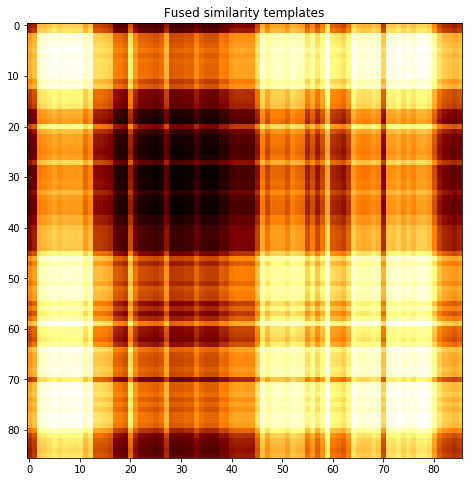

subject 30; gesture 1_1_1


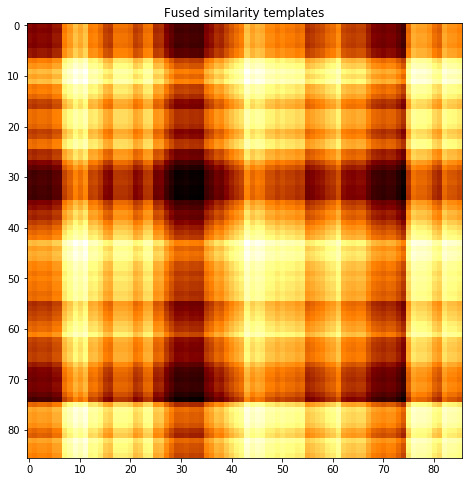

subject 30; gesture 1_0_1


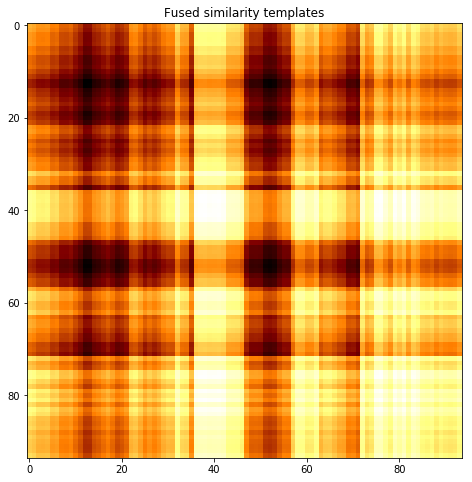

subject 30; gesture 1_0_2


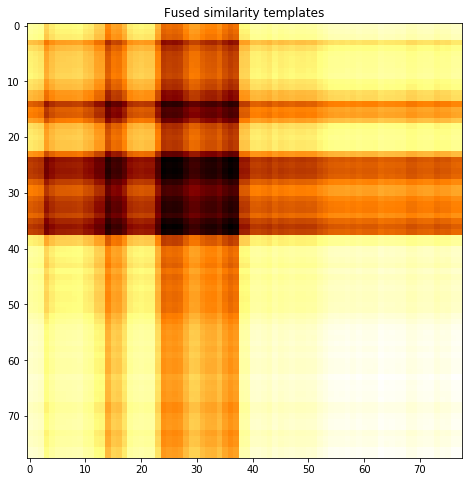

subject 06; gesture 1_1_2


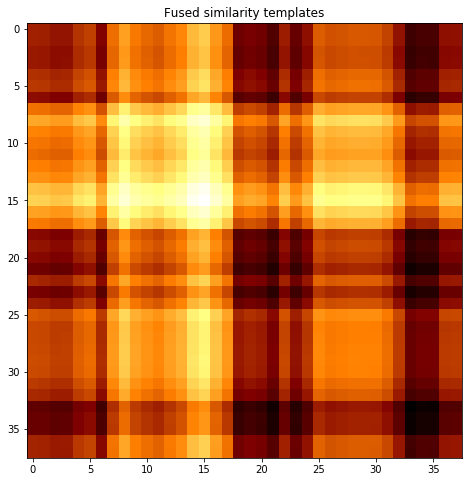

subject 06; gesture 1_1_1


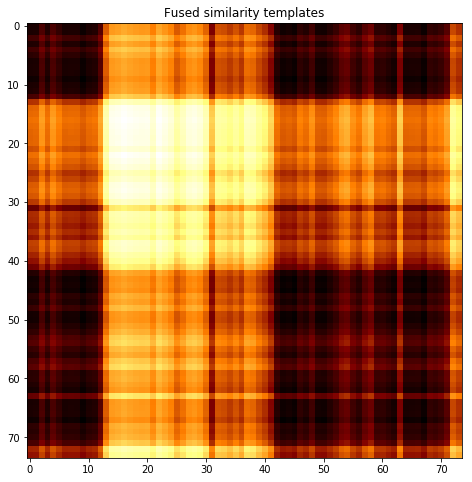

subject 06; gesture 1_0_1


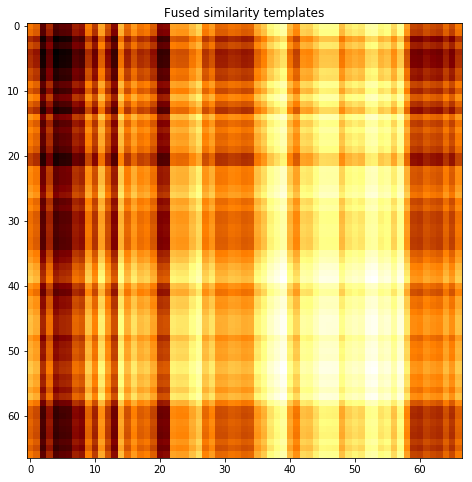

subject 06; gesture 1_0_2


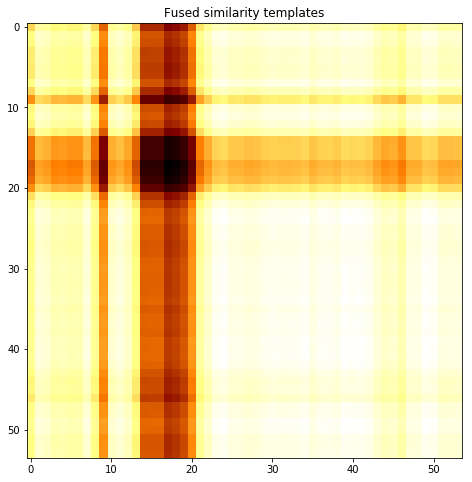

subject 09; gesture 1_1_2


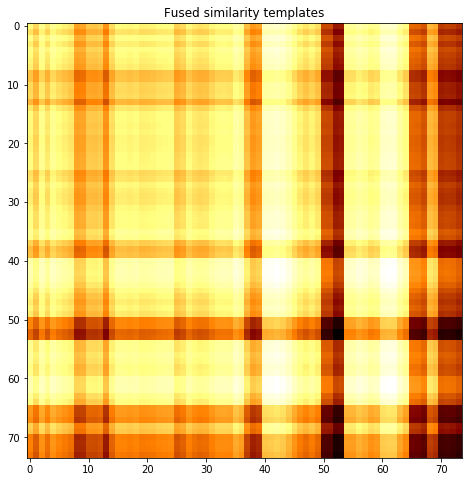

subject 09; gesture 1_1_1


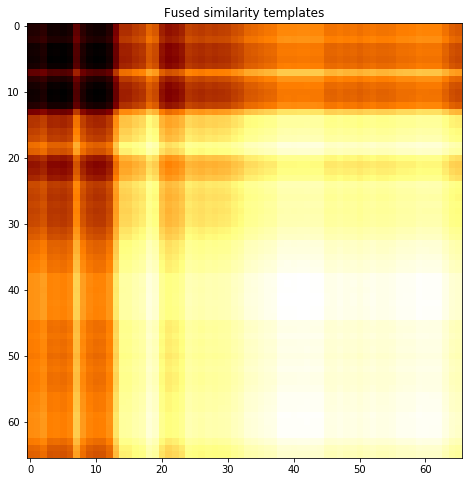

subject 09; gesture 1_0_1


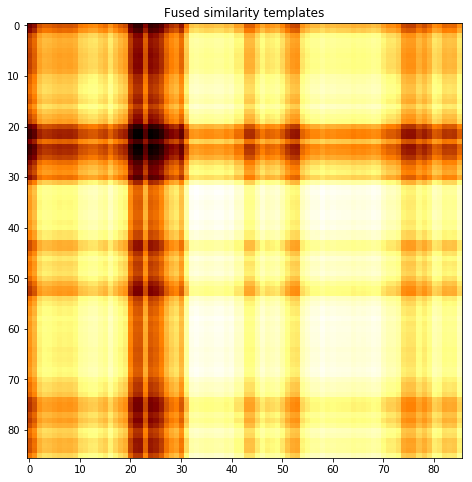

subject 09; gesture 1_0_2


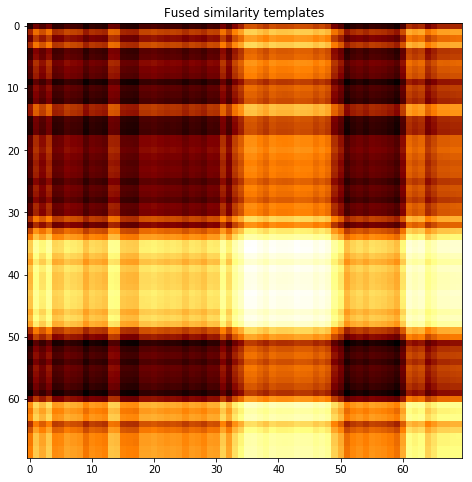

subject 03; gesture 1_1_2


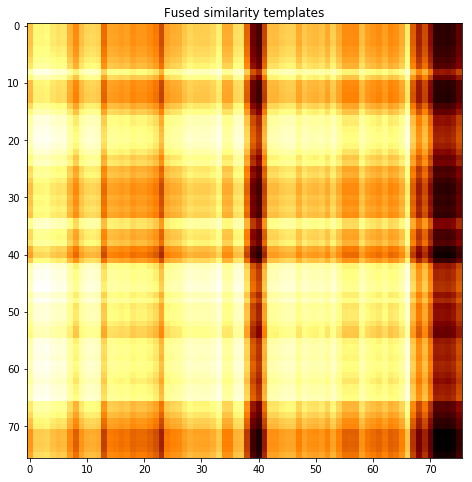

subject 03; gesture 1_1_1


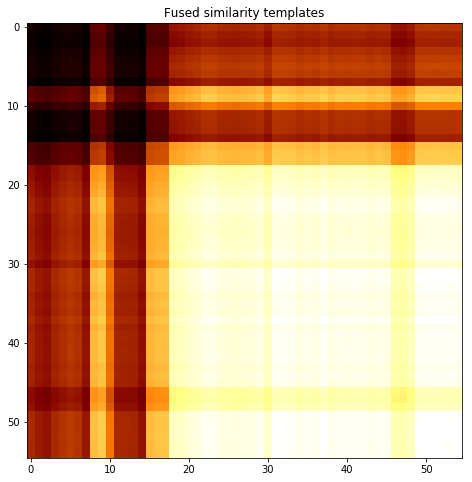

subject 03; gesture 1_0_1


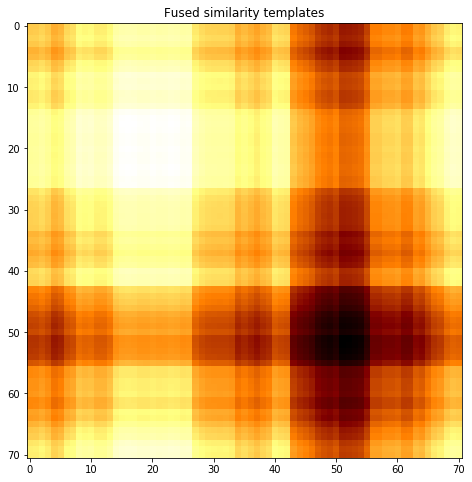

subject 03; gesture 1_0_2


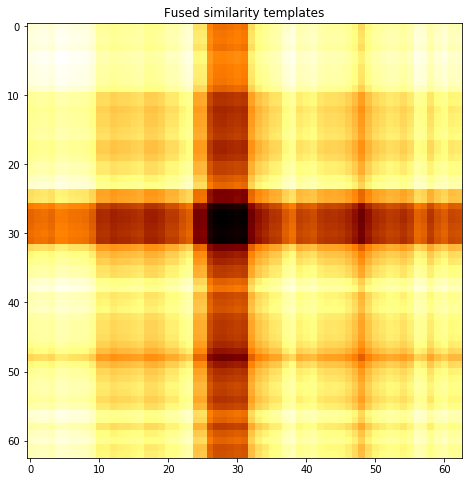

subject 05; gesture 1_1_2


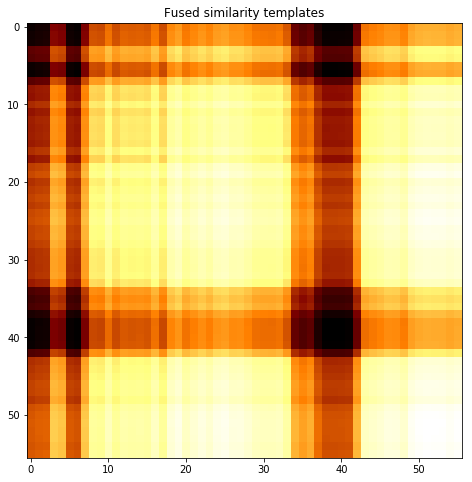

subject 05; gesture 1_1_1


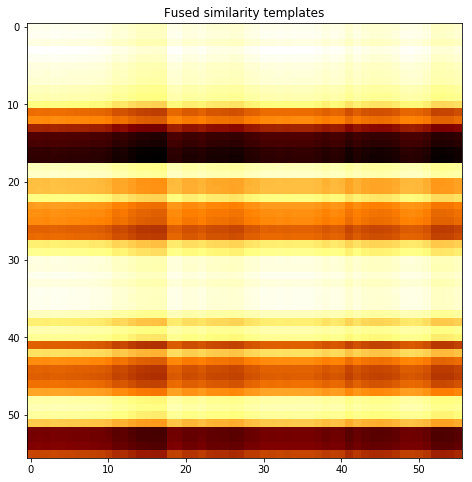

subject 05; gesture 1_0_1


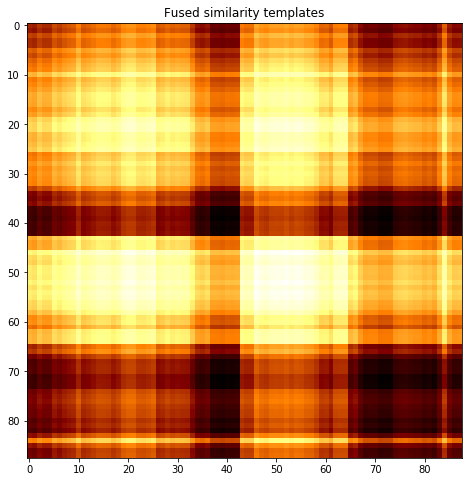

subject 05; gesture 1_0_2


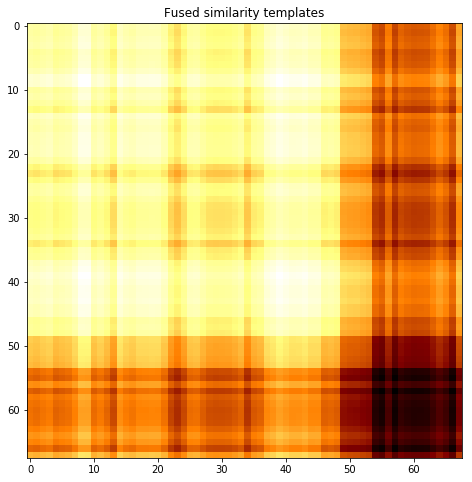

subject 21; gesture 1_1_2


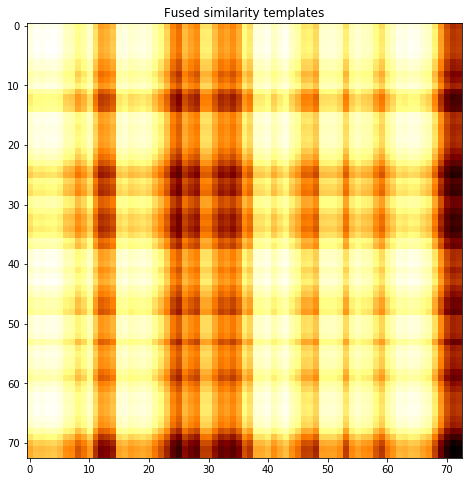

subject 21; gesture 1_1_1


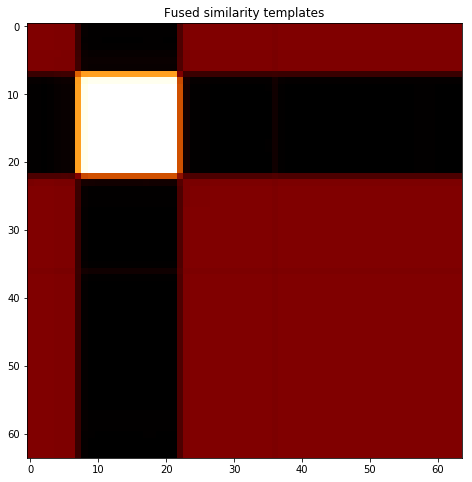

subject 21; gesture 1_0_1


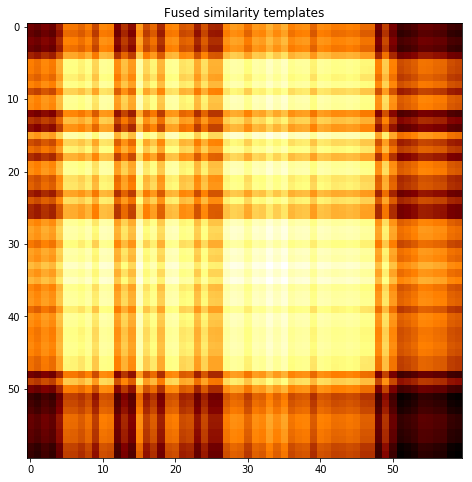

subject 21; gesture 1_0_2


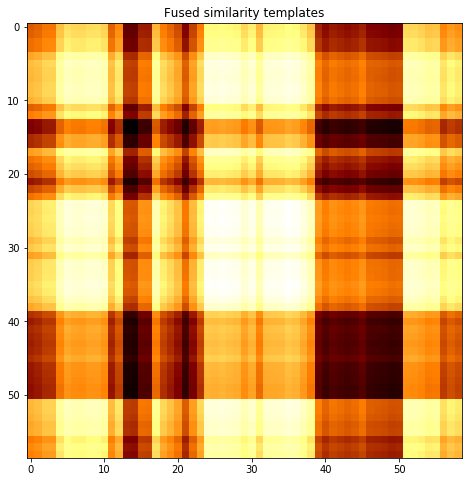

subject 17; gesture 1_1_2


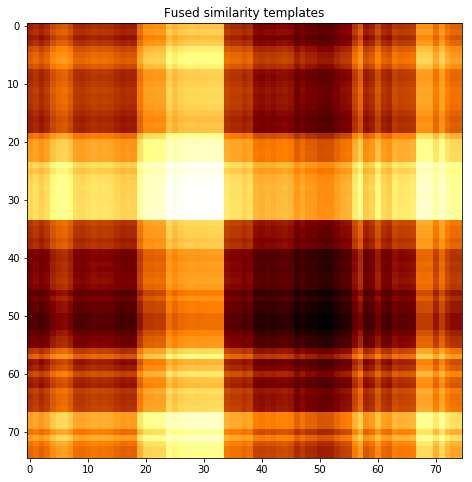

subject 17; gesture 1_1_1


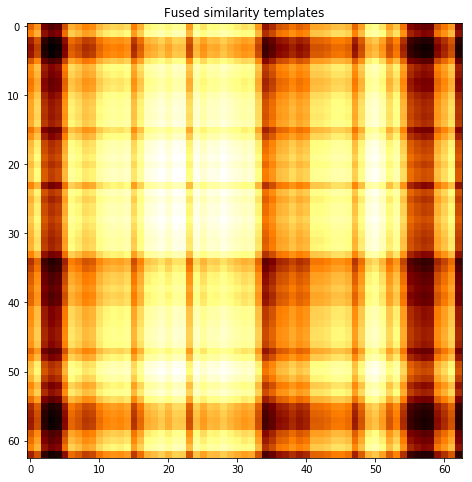

subject 17; gesture 1_0_1


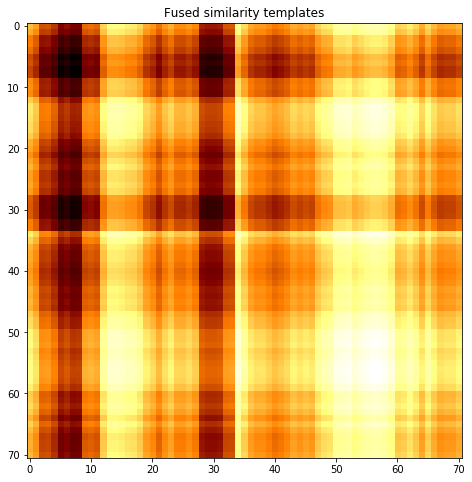

subject 17; gesture 1_0_2


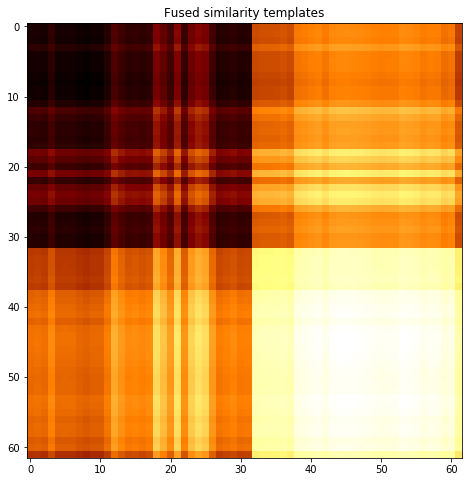

subject 01; gesture 1_1_2


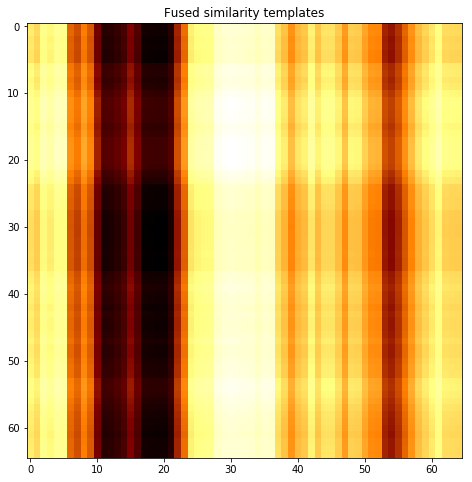

subject 01; gesture 1_1_1


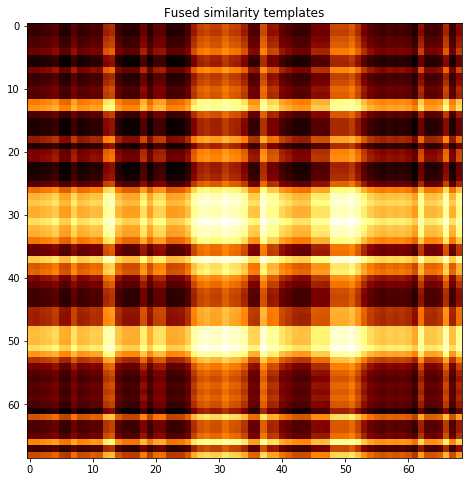

subject 01; gesture 1_0_1


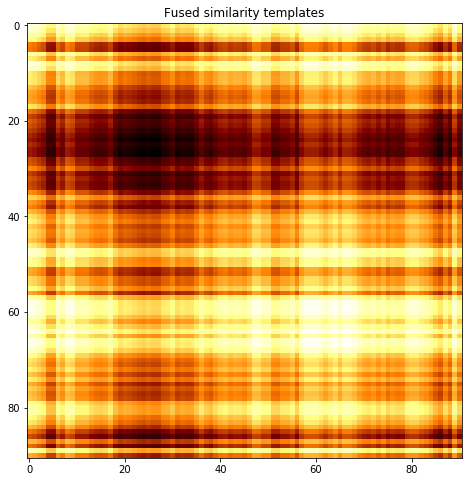

subject 01; gesture 1_0_2


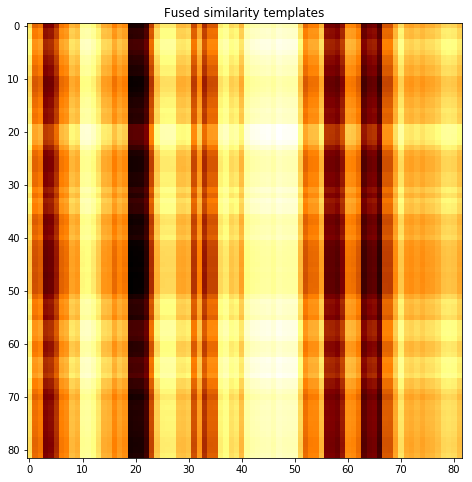

subject 16; gesture 1_1_2


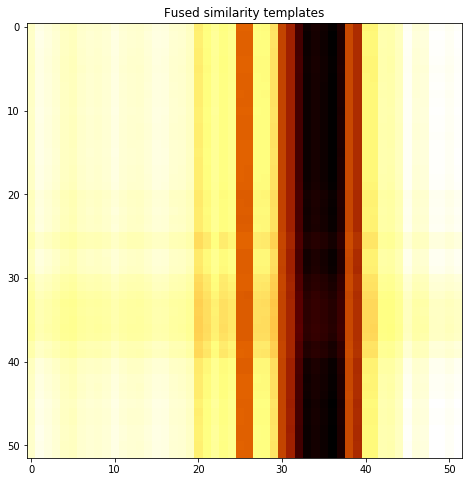

subject 16; gesture 1_1_1


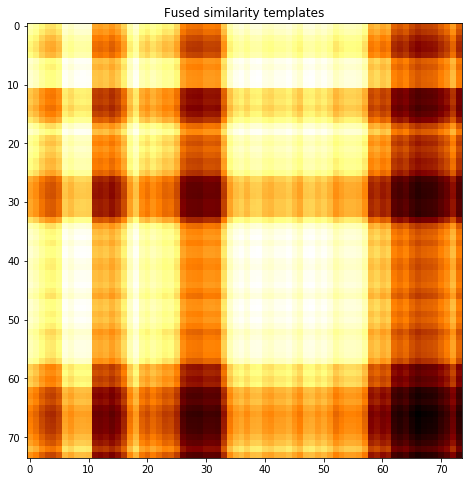

subject 16; gesture 1_0_1


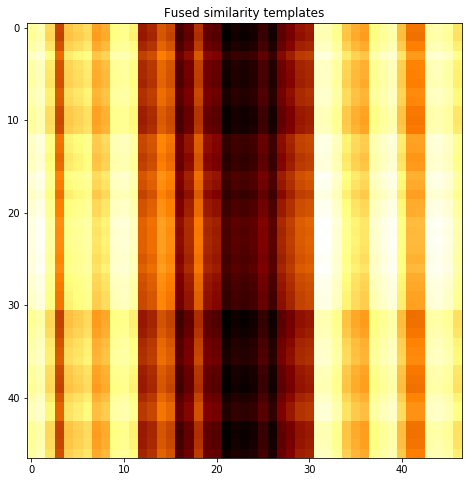

subject 16; gesture 1_0_2


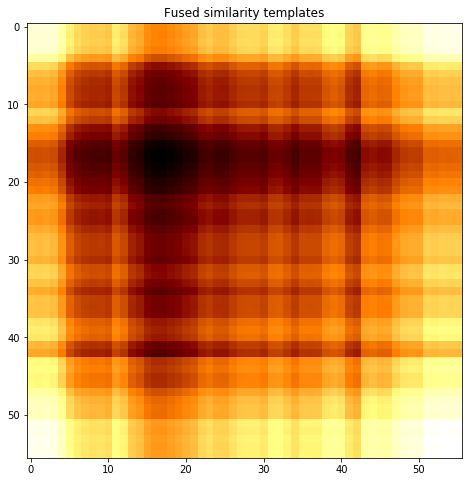

subject 26; gesture 1_1_2


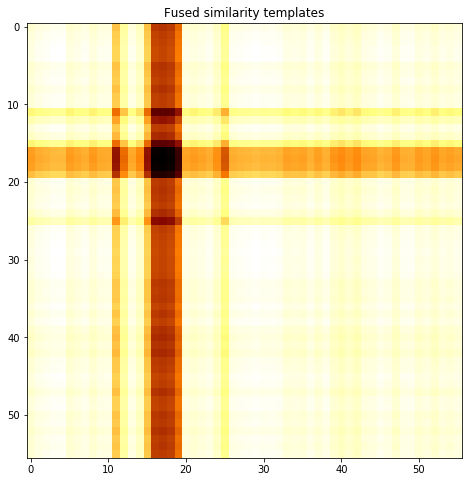

subject 26; gesture 1_1_1


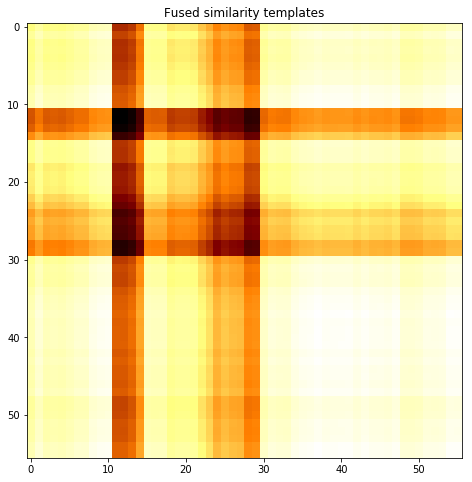

subject 26; gesture 1_0_1


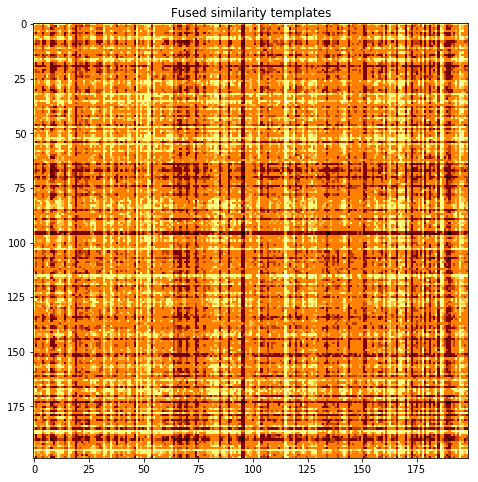

subject 26; gesture 1_0_2


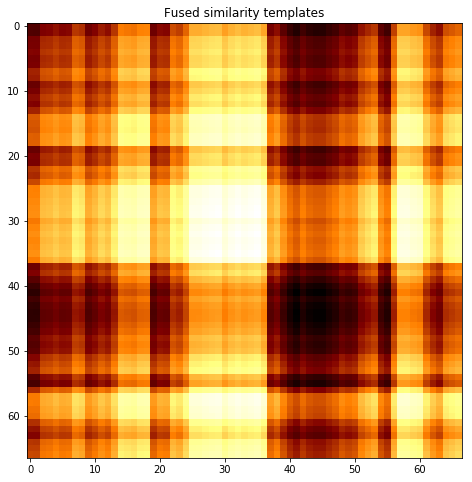

subject 32; gesture 1_1_2


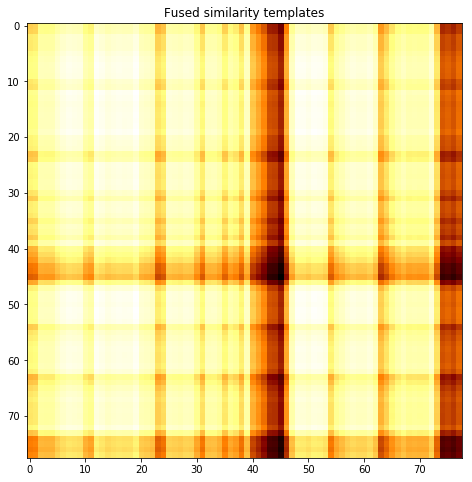

subject 32; gesture 1_1_1


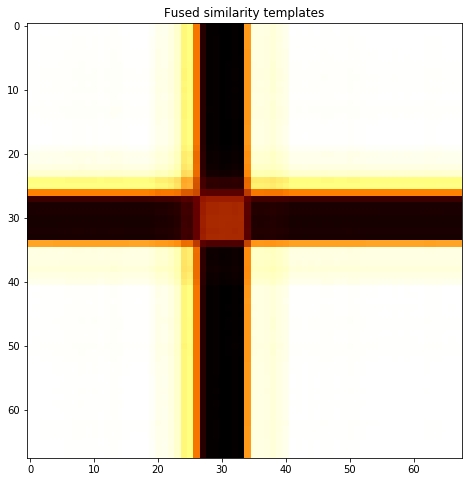

subject 32; gesture 1_0_1


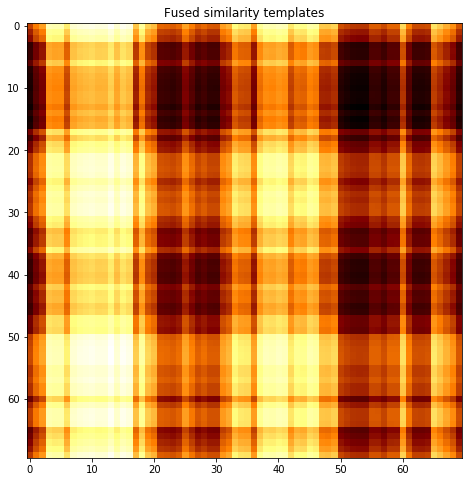

subject 32; gesture 1_0_2


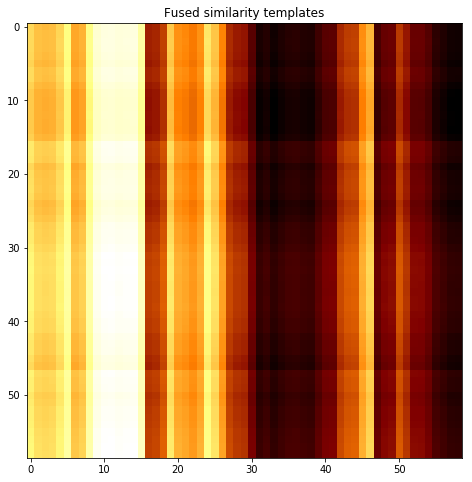

subject 04; gesture 1_1_2


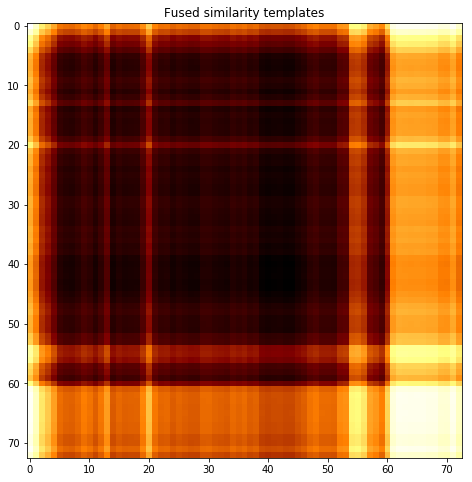

subject 04; gesture 1_1_1


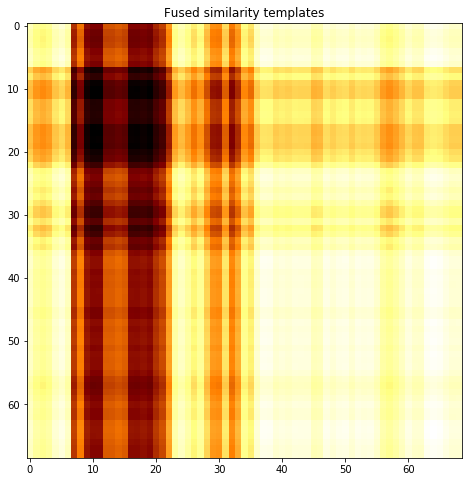

subject 04; gesture 1_0_1


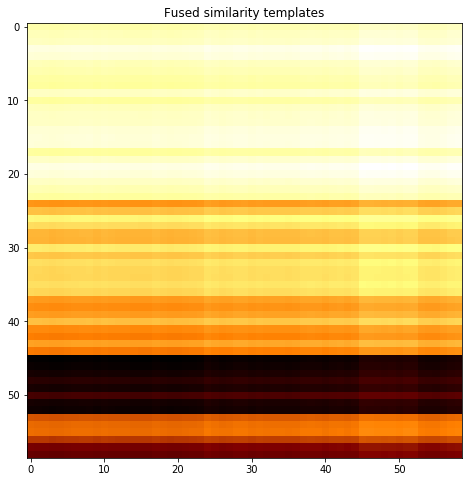

subject 04; gesture 1_0_2


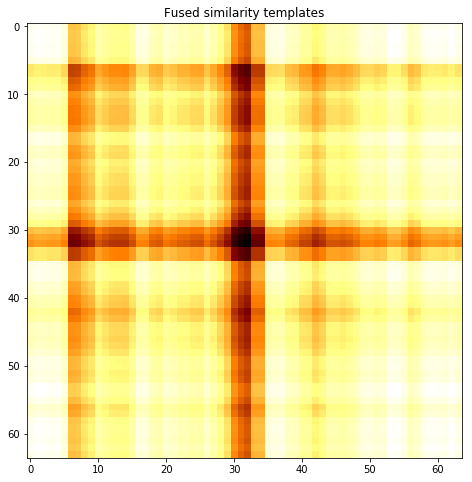

subject 08; gesture 1_1_2


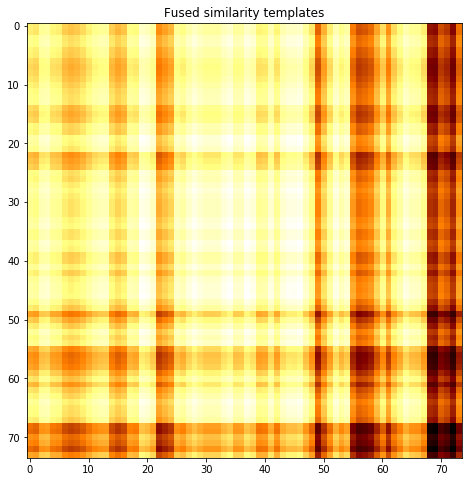

subject 08; gesture 1_1_1


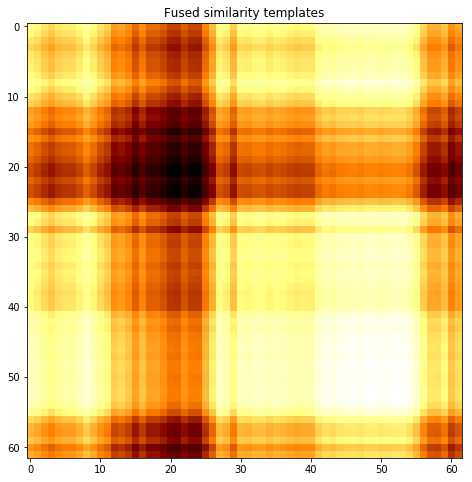

subject 08; gesture 1_0_1


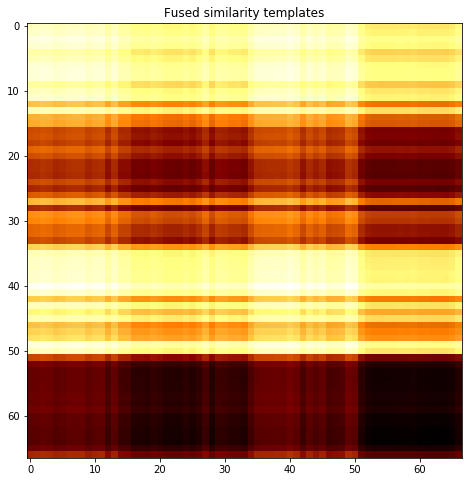

subject 08; gesture 1_0_2


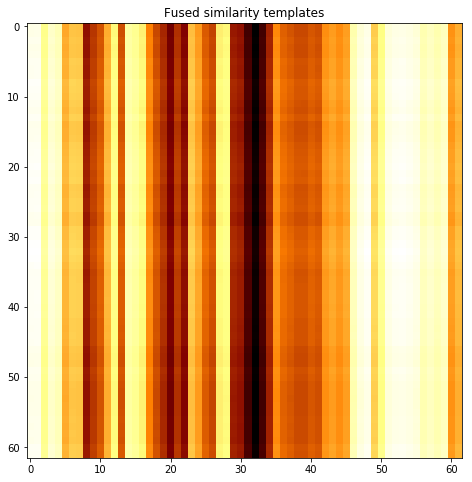

subject 27; gesture 1_1_2


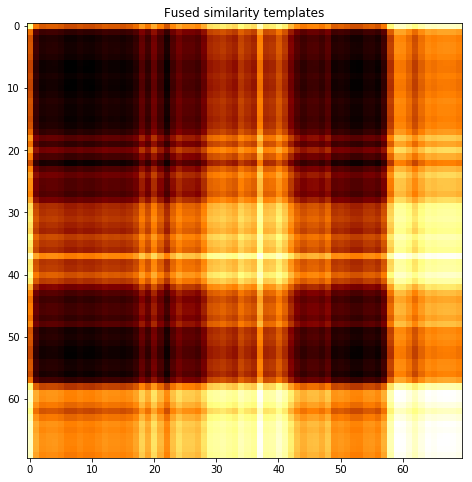

subject 27; gesture 1_1_1


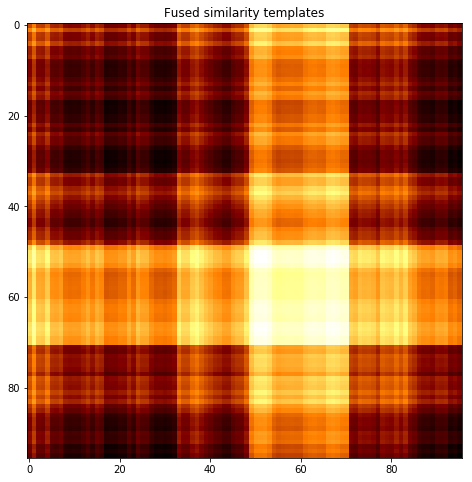

subject 27; gesture 1_0_1


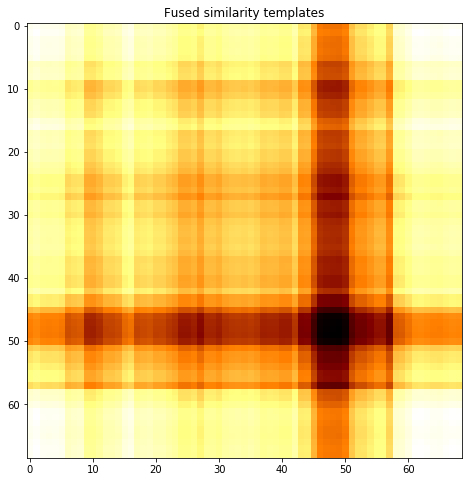

subject 27; gesture 1_0_2


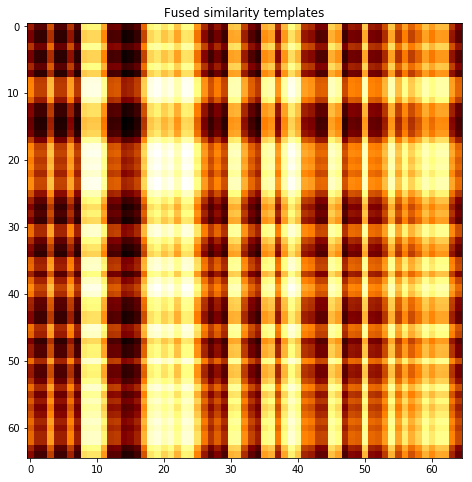

subject 14; gesture 1_1_2


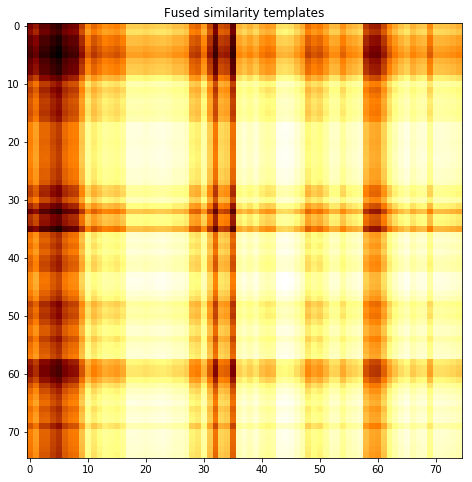

subject 14; gesture 1_1_1


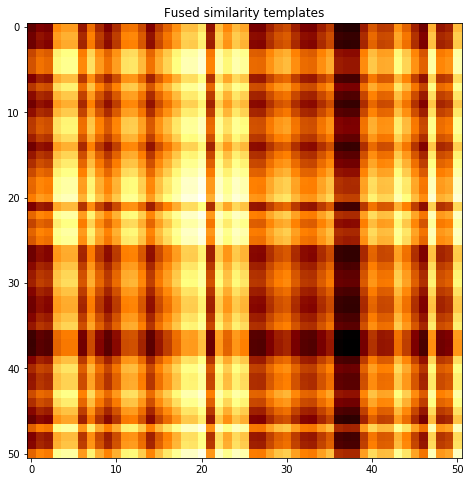

subject 14; gesture 1_0_1


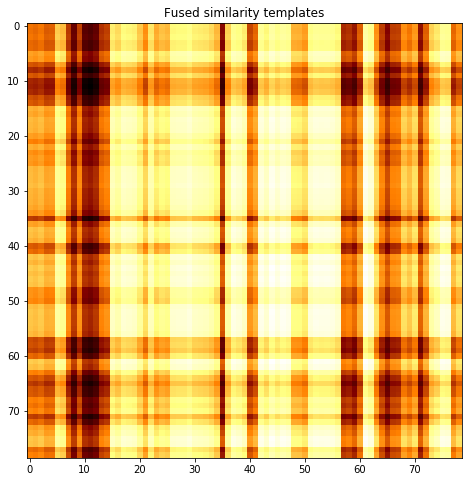

subject 14; gesture 1_0_2


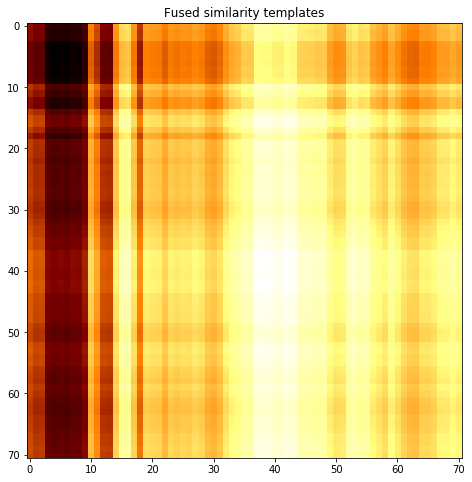

subject 23; gesture 1_1_2


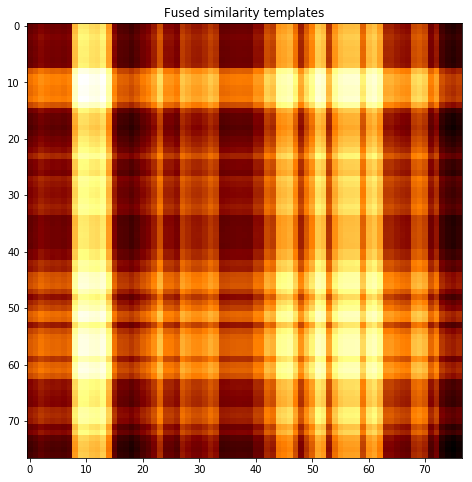

subject 23; gesture 1_1_1


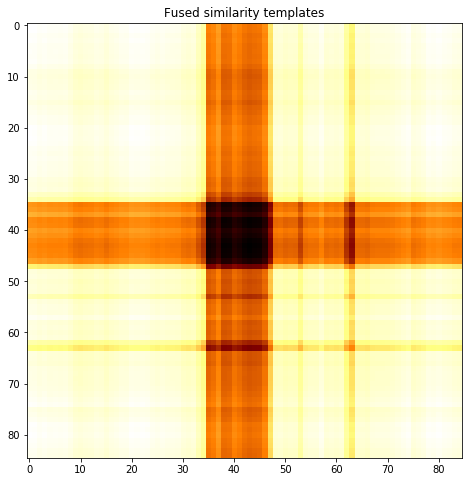

subject 23; gesture 1_0_1


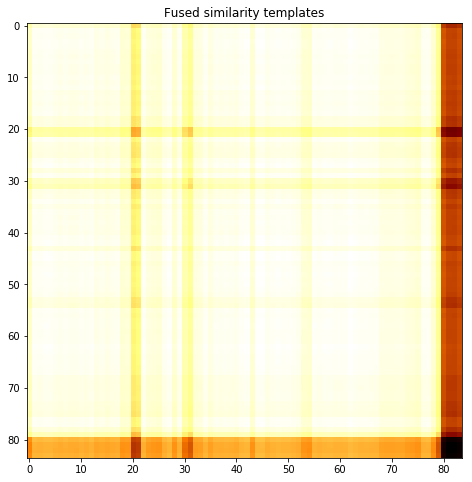

subject 23; gesture 1_0_2


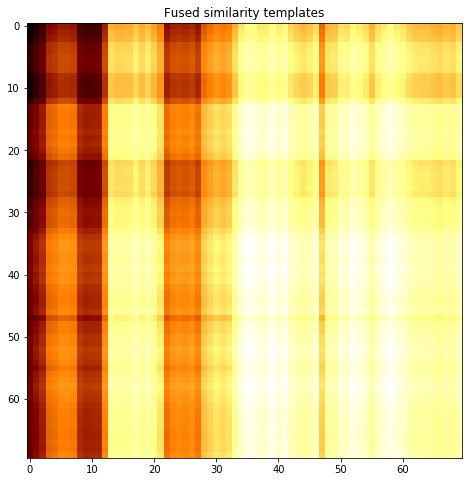

subject 25; gesture 1_1_2


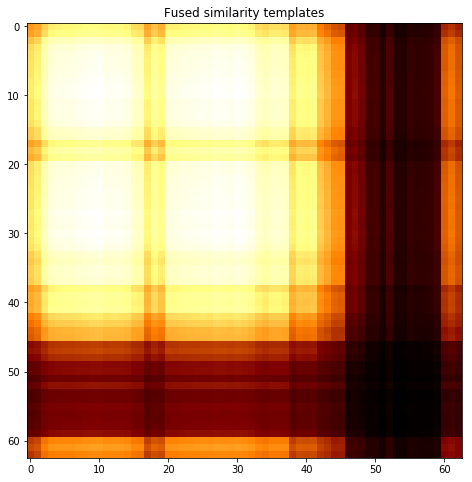

subject 25; gesture 1_1_1


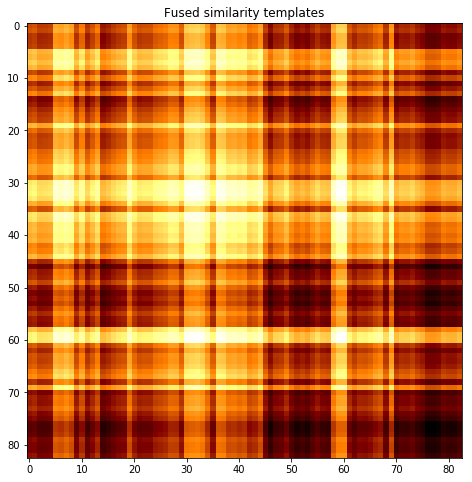

subject 25; gesture 1_0_1


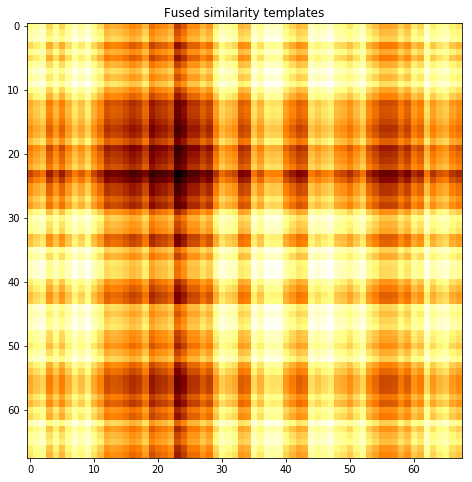

subject 25; gesture 1_0_2


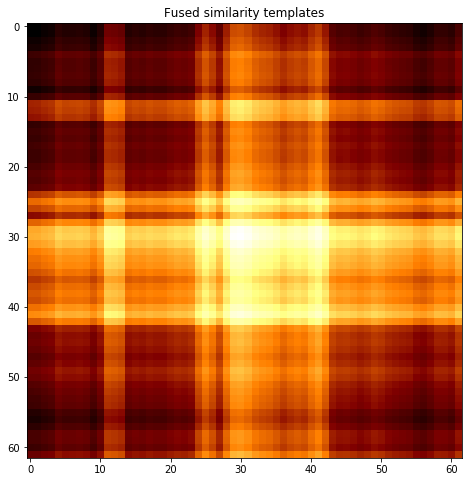

subject 18; gesture 1_1_2


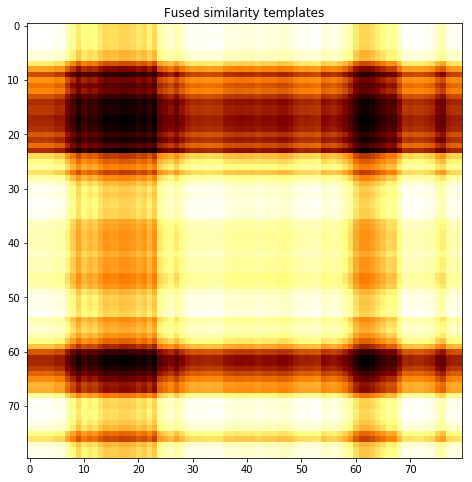

subject 18; gesture 1_1_1


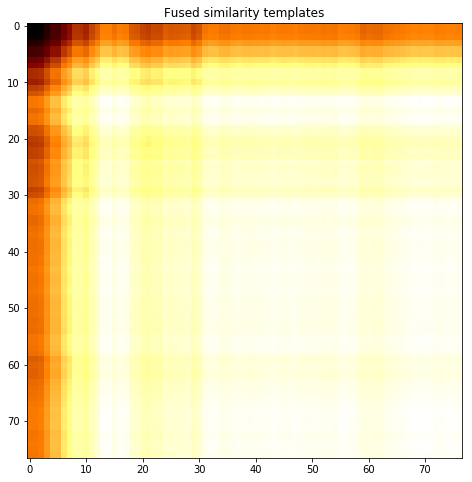

subject 18; gesture 1_0_1


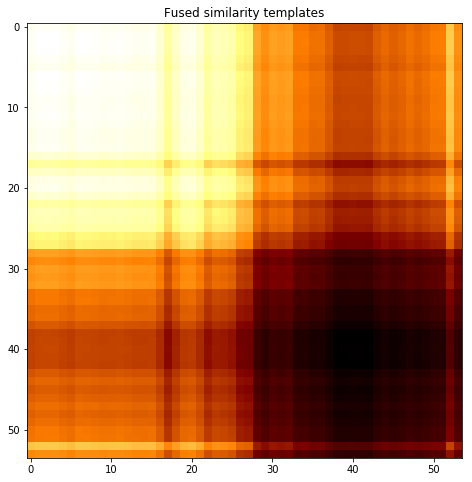

subject 18; gesture 1_0_2


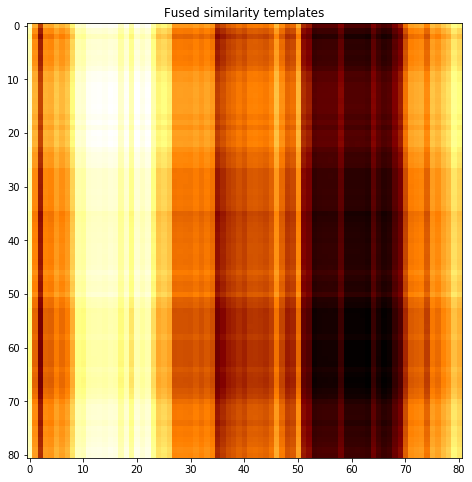

subject 29; gesture 1_1_2


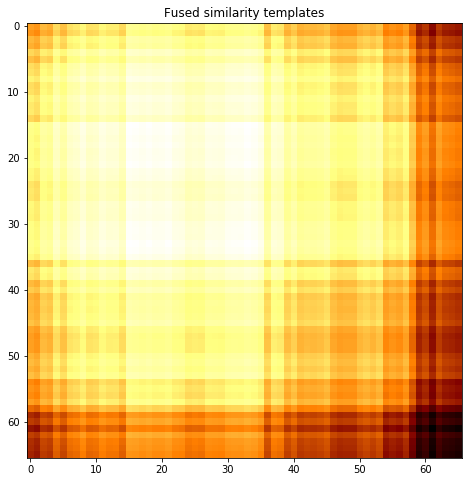

subject 29; gesture 1_1_1


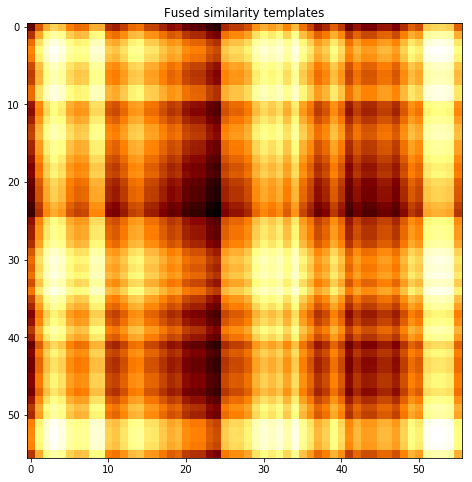

subject 29; gesture 1_0_1


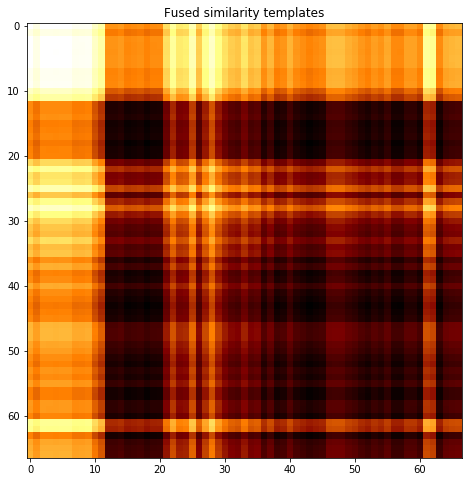

subject 29; gesture 1_0_2


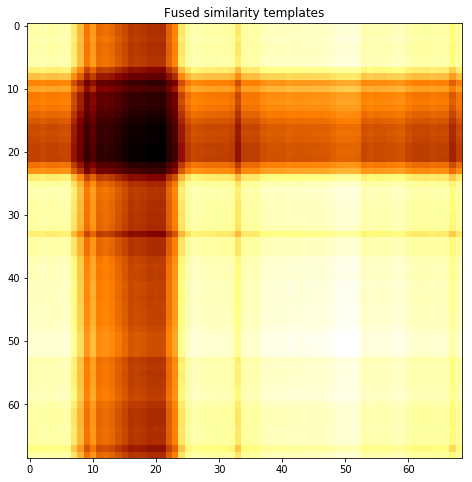

subject 15; gesture 1_1_2


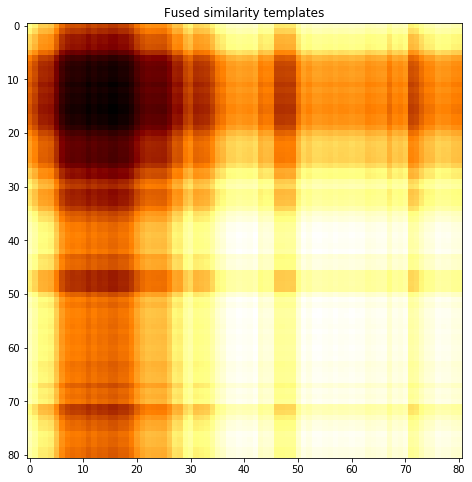

subject 15; gesture 1_1_1


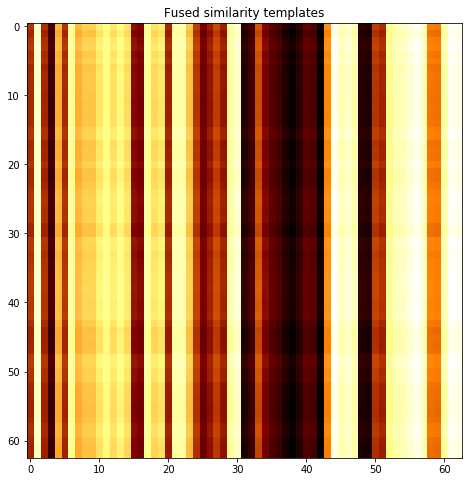

subject 15; gesture 1_0_1


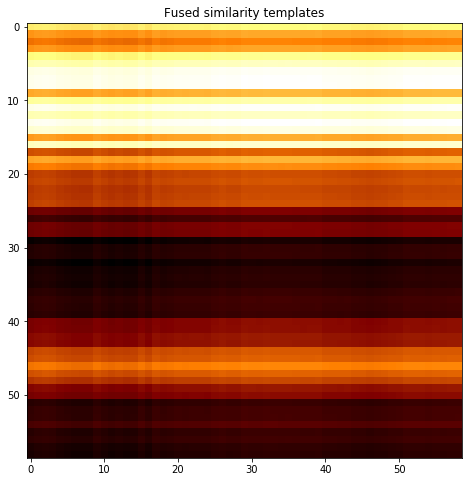

subject 15; gesture 1_0_2


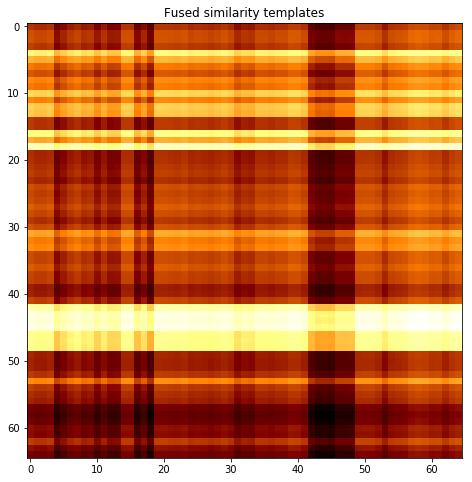

subject 28; gesture 1_1_2


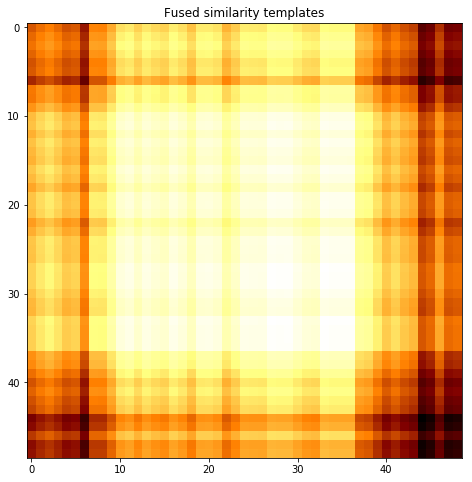

subject 28; gesture 1_1_1


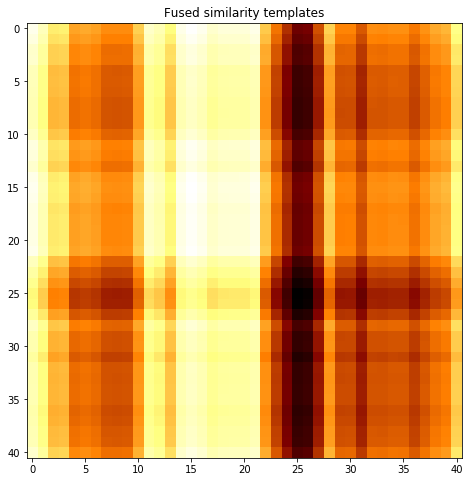

subject 28; gesture 1_0_1


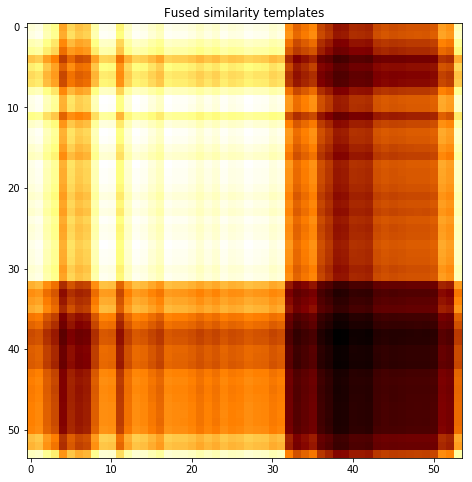

subject 28; gesture 1_0_2


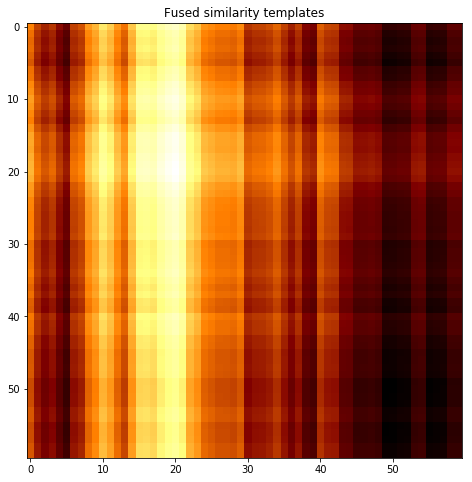

subject 12; gesture 1_1_2


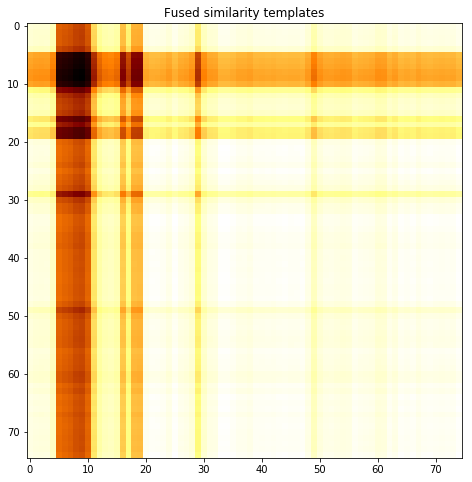

subject 12; gesture 1_1_1


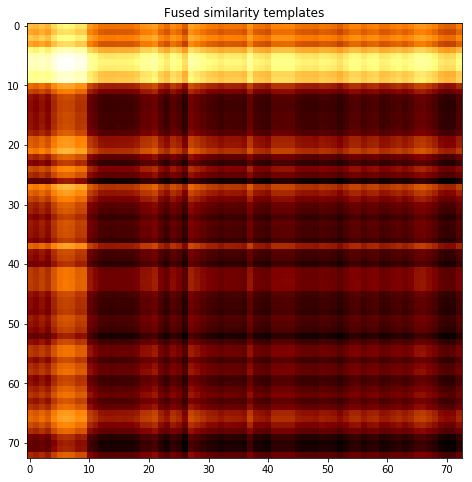

subject 12; gesture 1_0_1


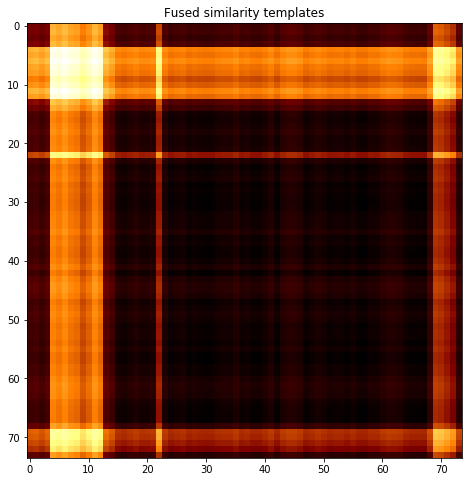

subject 12; gesture 1_0_2


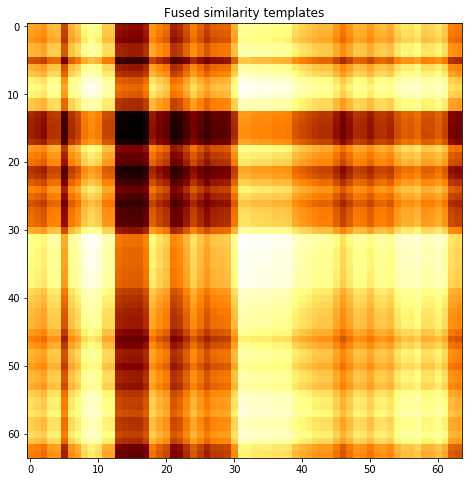

subject 19; gesture 1_1_2


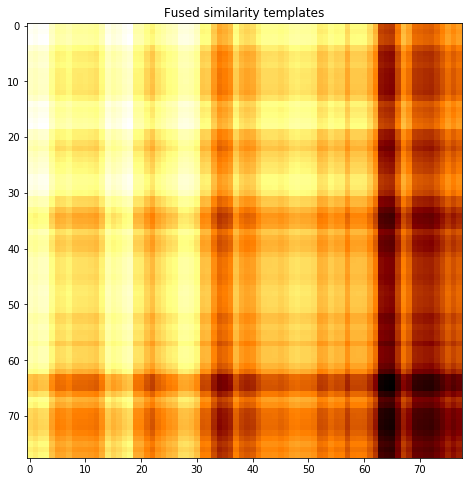

subject 19; gesture 1_1_1


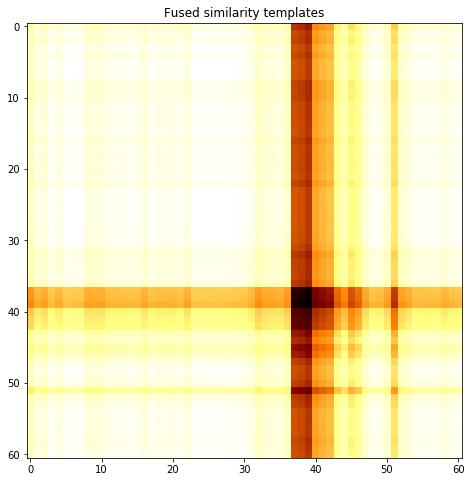

subject 19; gesture 1_0_1


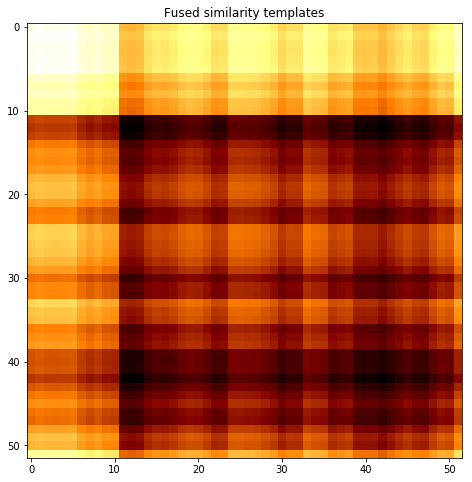

subject 19; gesture 1_0_2


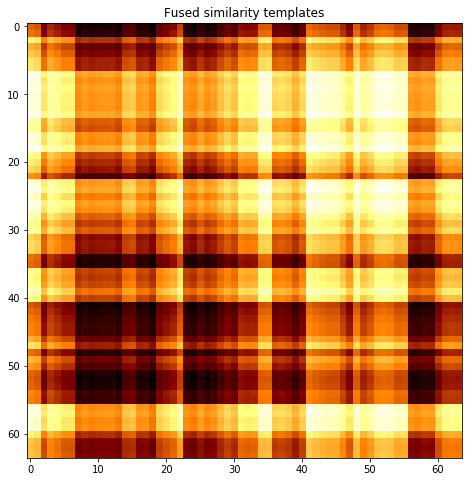

subject 07; gesture 1_1_2


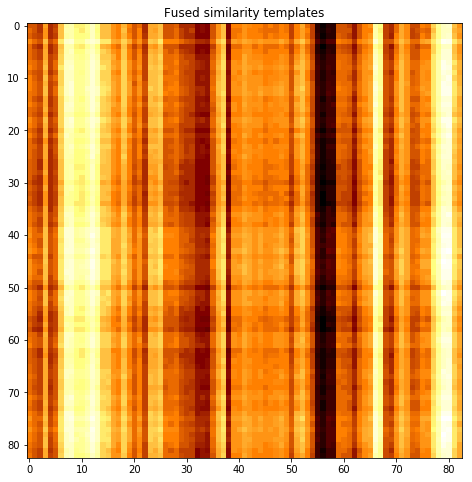

subject 07; gesture 1_1_1


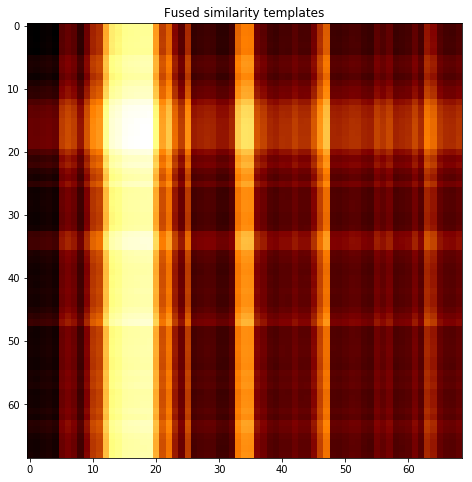

subject 07; gesture 1_0_1


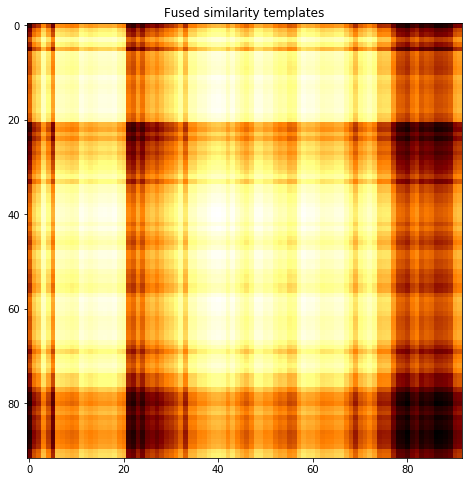

subject 07; gesture 1_0_2


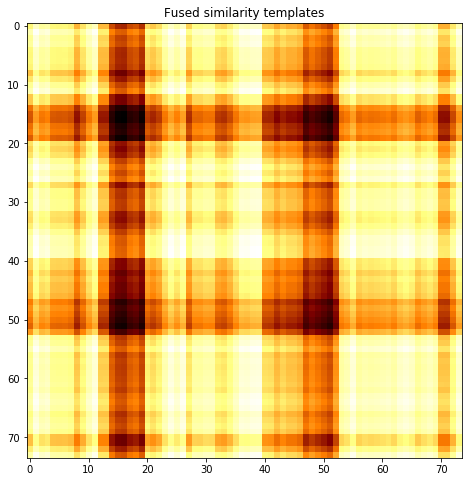

subject 20; gesture 1_1_2


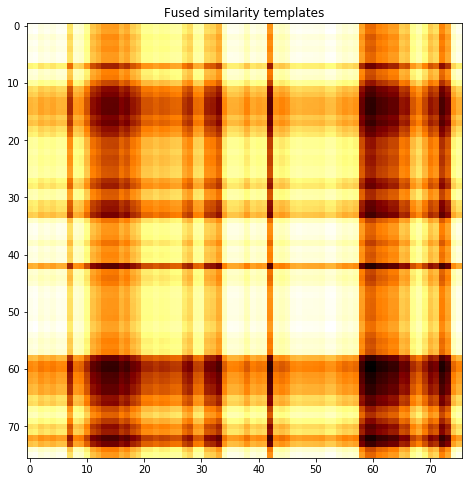

subject 20; gesture 1_1_1


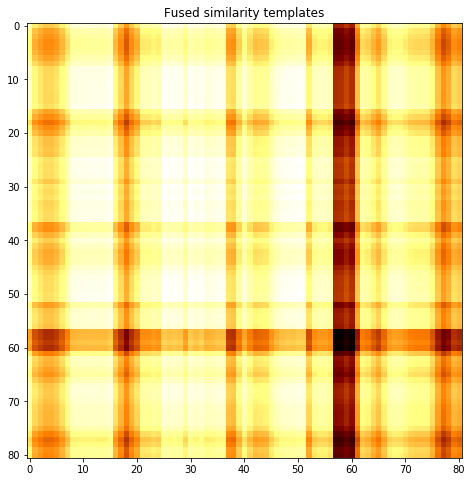

subject 20; gesture 1_0_1


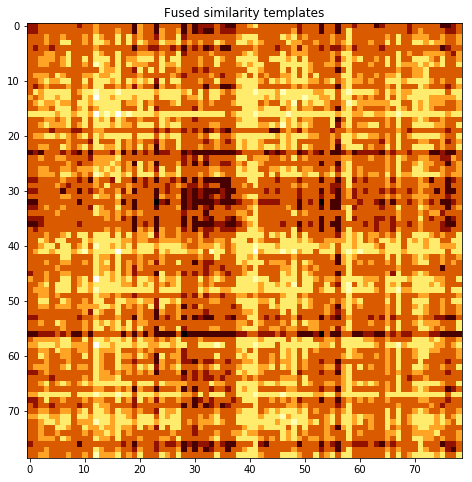

subject 20; gesture 1_0_2


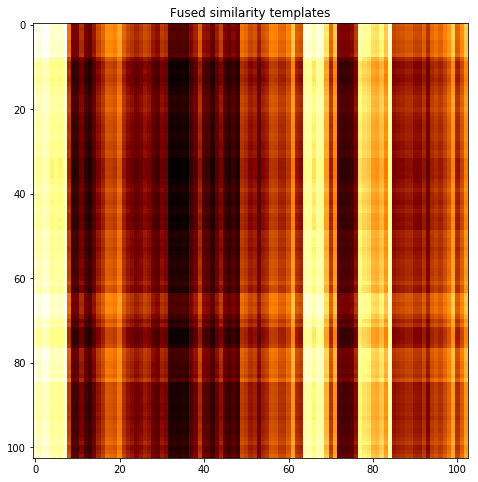

subject 31; gesture 1_1_2


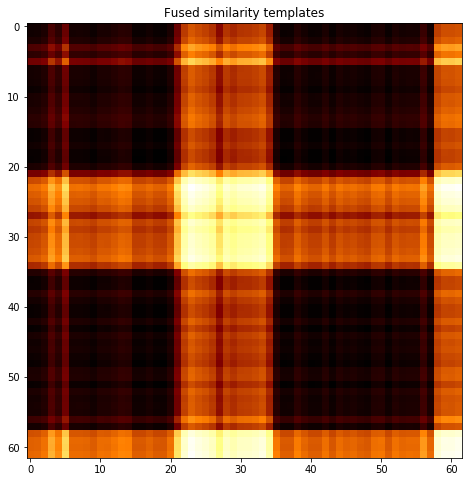

subject 31; gesture 1_1_1


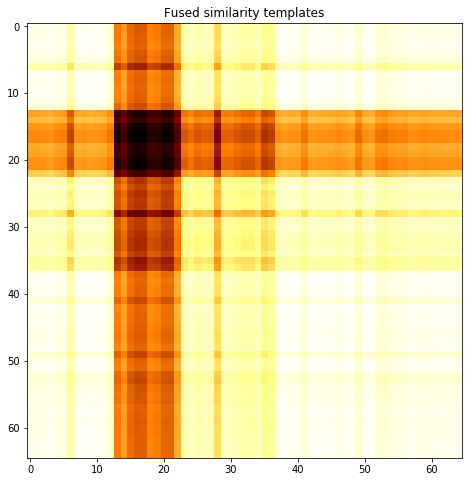

subject 31; gesture 1_0_1


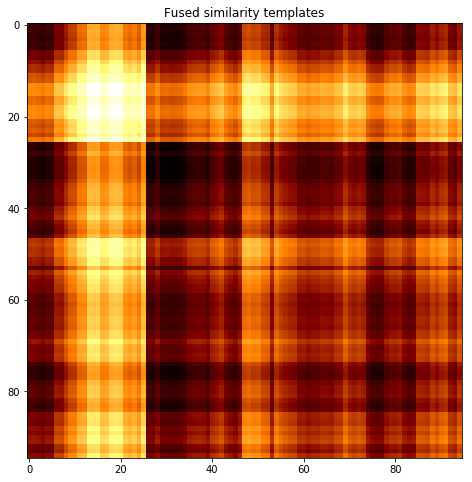

subject 31; gesture 1_0_2


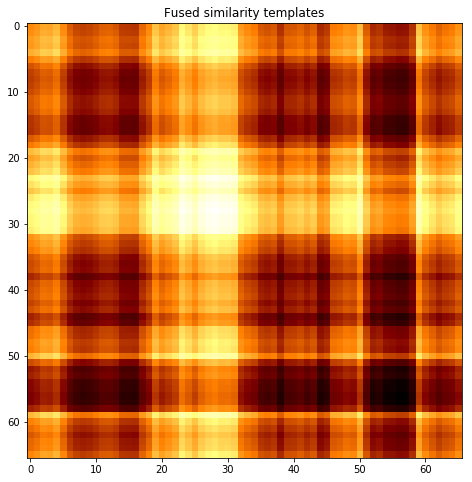

subject 13; gesture 1_1_2


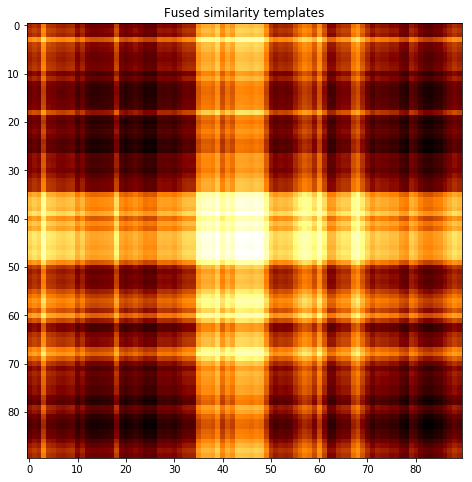

subject 13; gesture 1_1_1


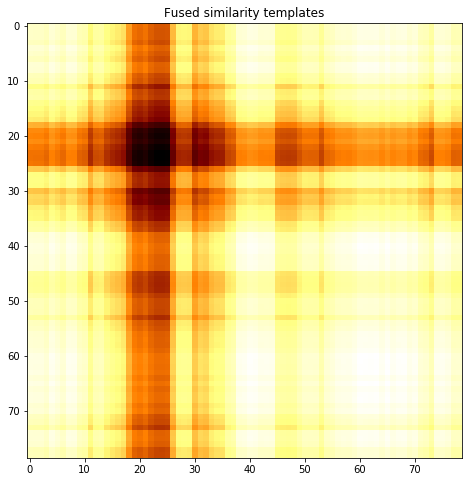

subject 13; gesture 1_0_1


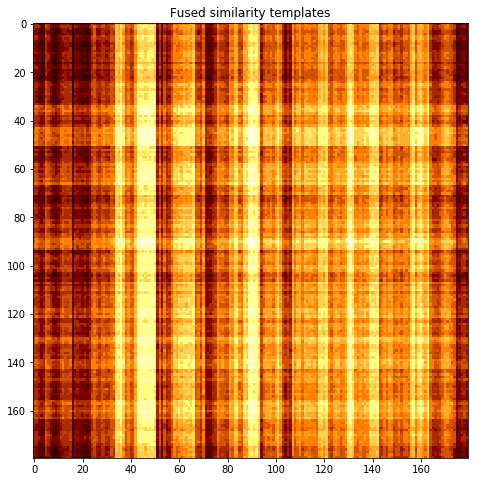

subject 13; gesture 1_0_2


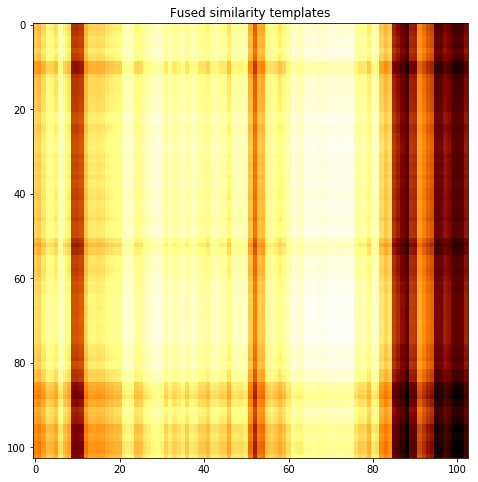

subject 36; gesture 1_1_2


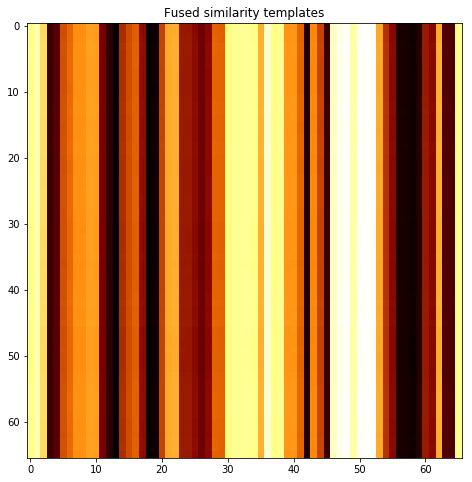

subject 36; gesture 1_1_1


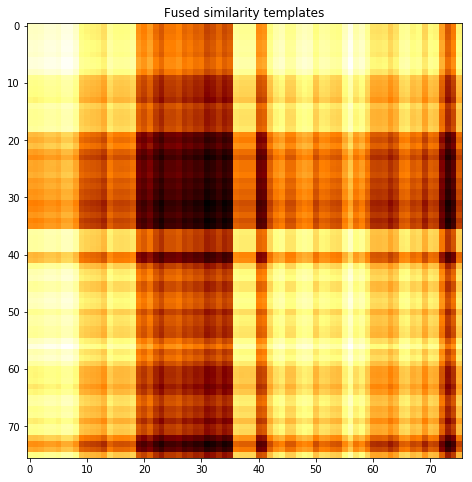

subject 36; gesture 1_0_1


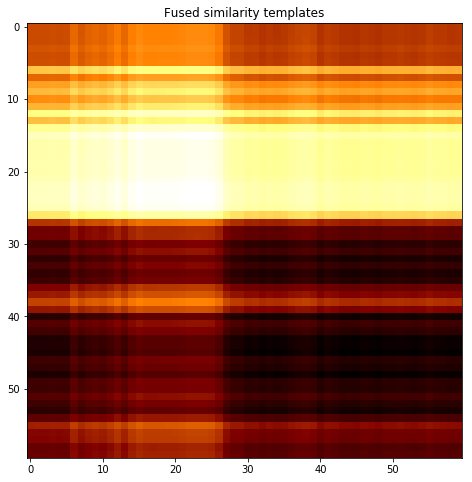

subject 36; gesture 1_0_2


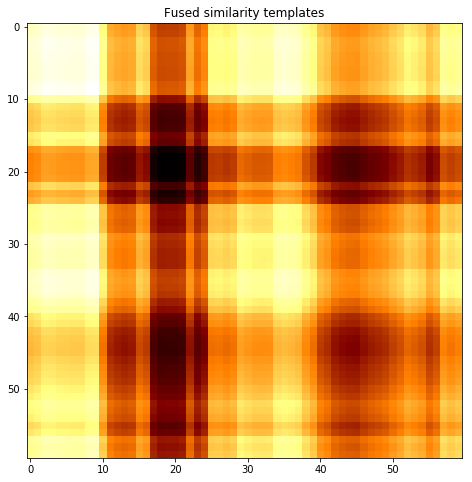

subject 24; gesture 1_1_2


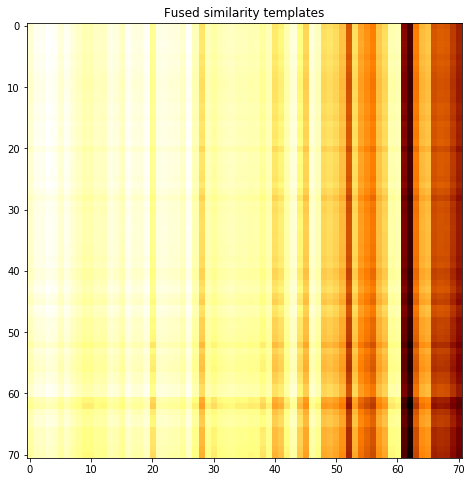

subject 24; gesture 1_1_1


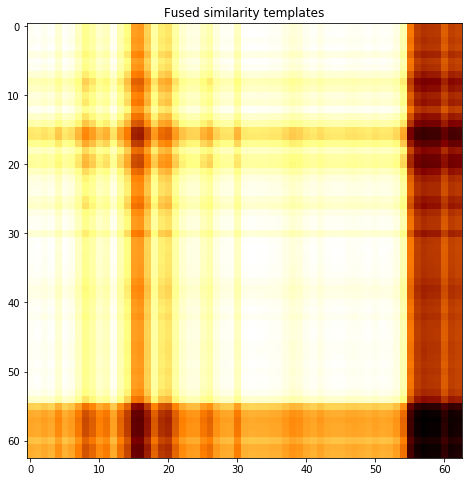

subject 24; gesture 1_0_1


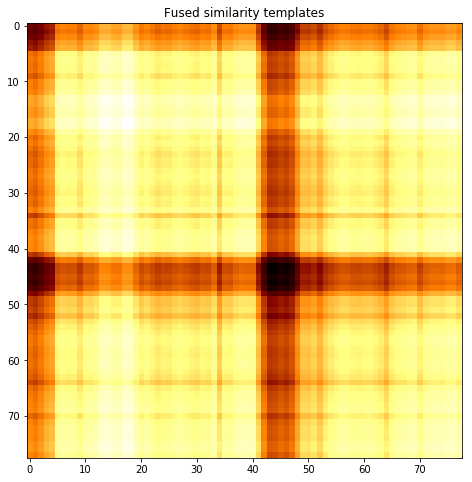

subject 24; gesture 1_0_2


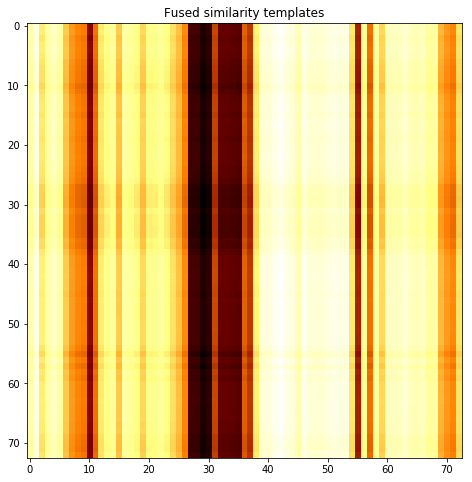

subject 33; gesture 1_1_2


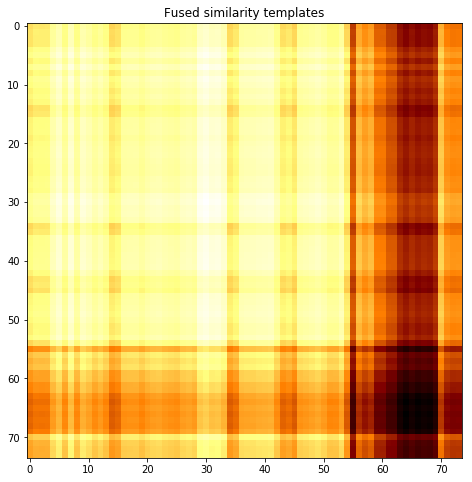

subject 33; gesture 1_1_1


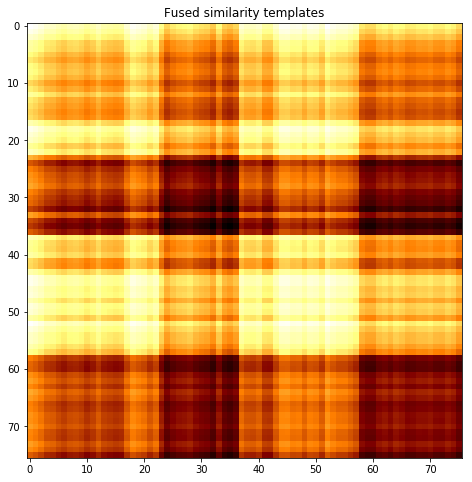

subject 33; gesture 1_0_1


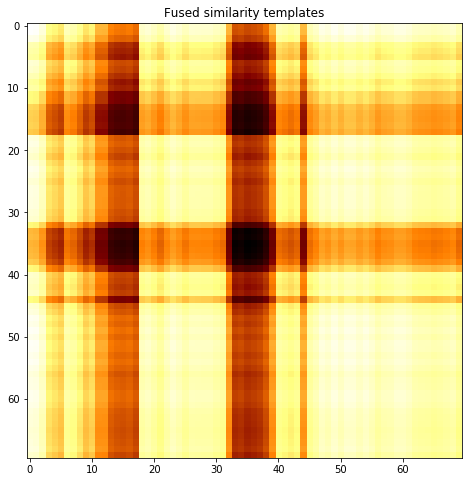

subject 33; gesture 1_0_2


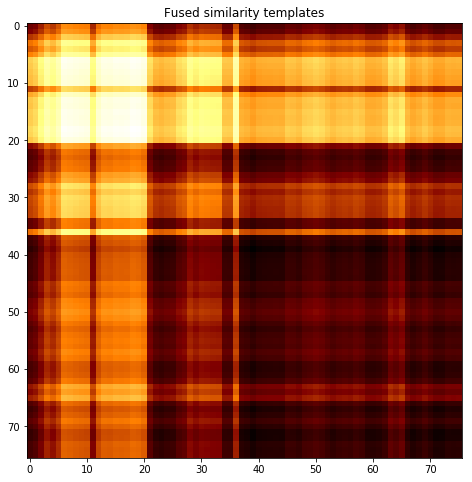

subject 11; gesture 1_1_2


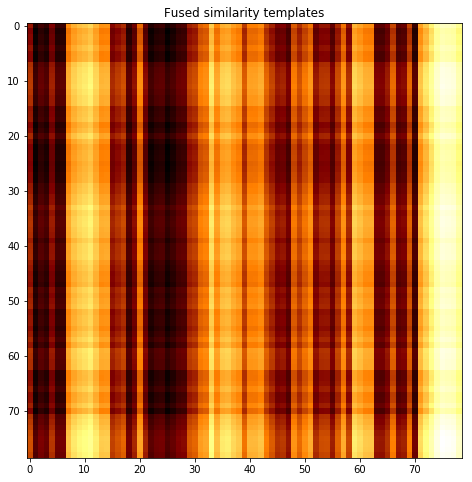

subject 11; gesture 1_1_1


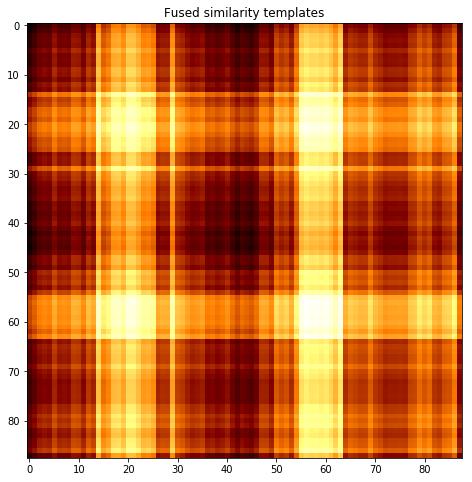

subject 11; gesture 1_0_1


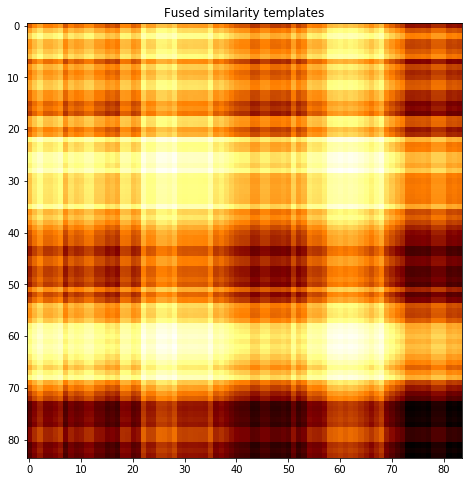

subject 11; gesture 1_0_2


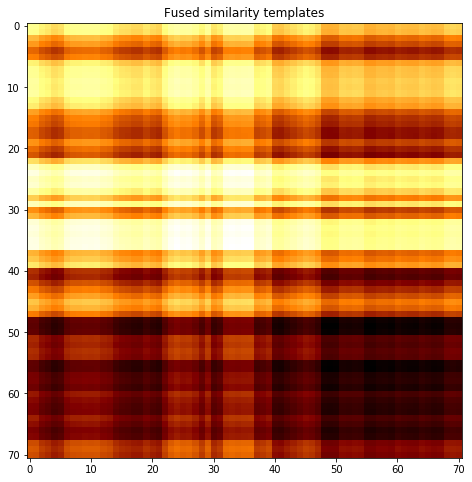

subject 35; gesture 1_1_2


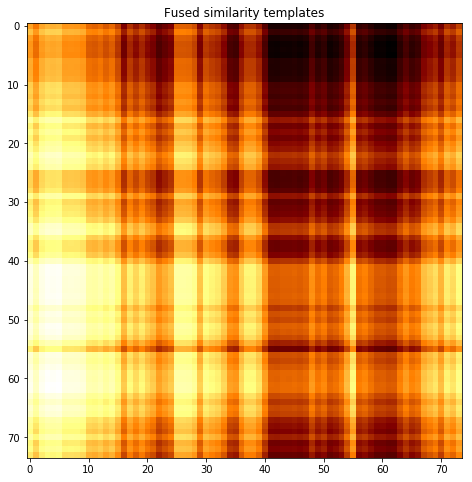

subject 35; gesture 1_1_1


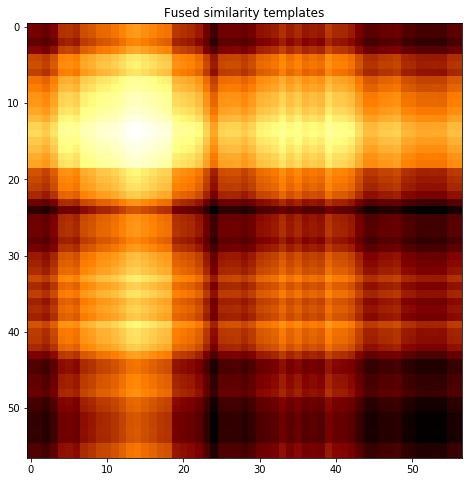

subject 35; gesture 1_0_1


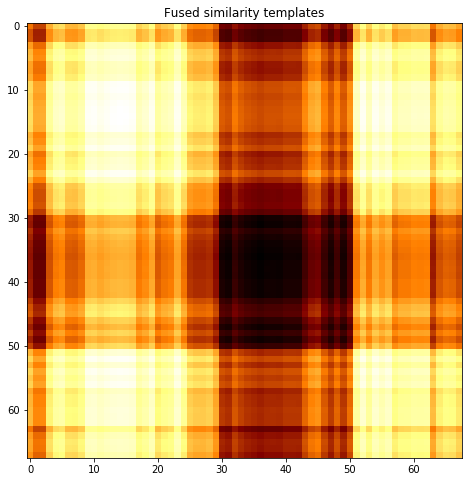

subject 35; gesture 1_0_2


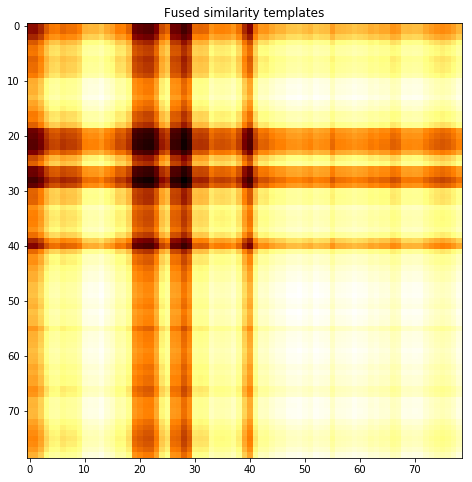

subject 22; gesture 1_1_2


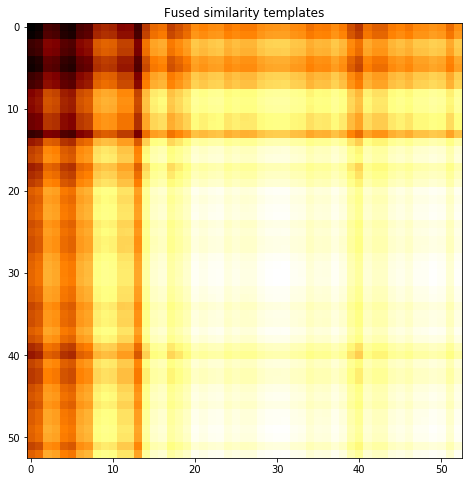

subject 22; gesture 1_1_1


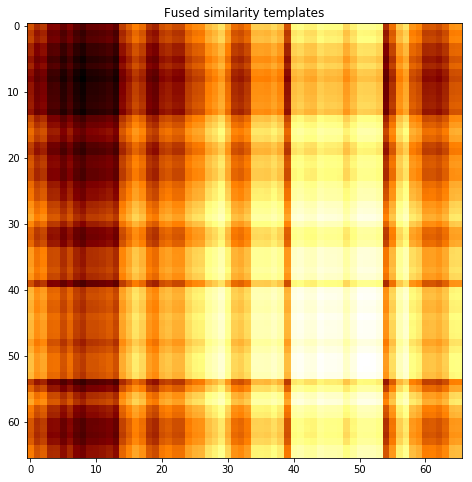

subject 22; gesture 1_0_1


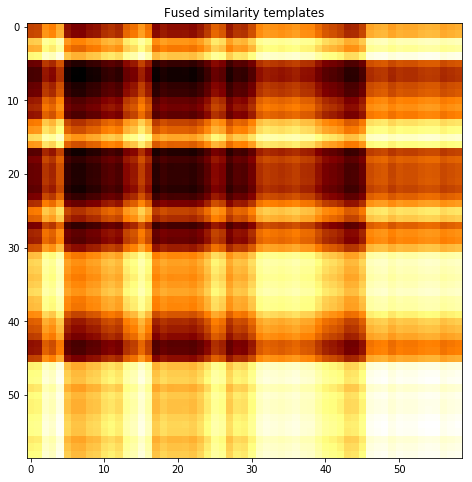

subject 22; gesture 1_0_2


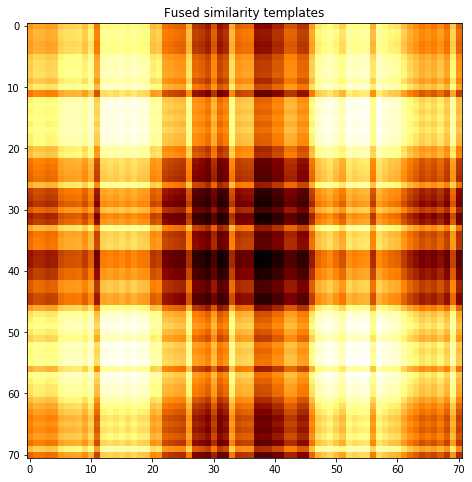

subject 34; gesture 1_1_2


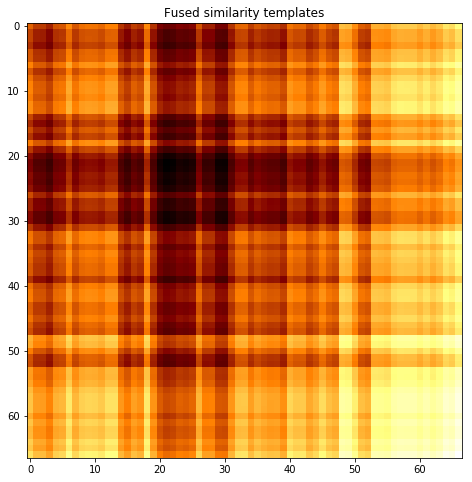

subject 34; gesture 1_1_1


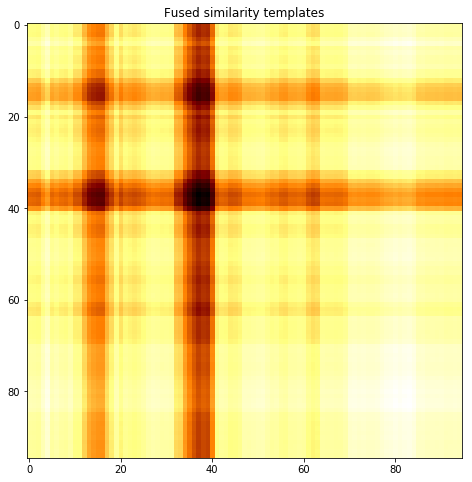

subject 34; gesture 1_0_1


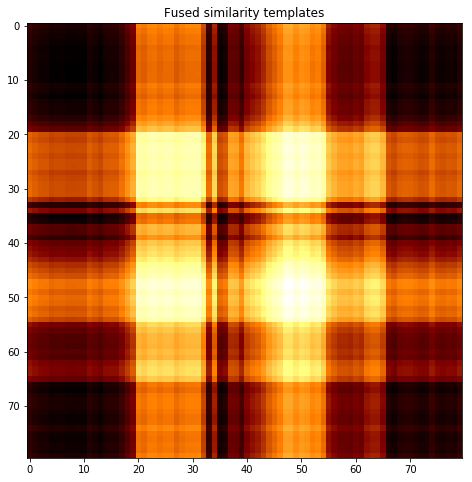

subject 34; gesture 1_0_2


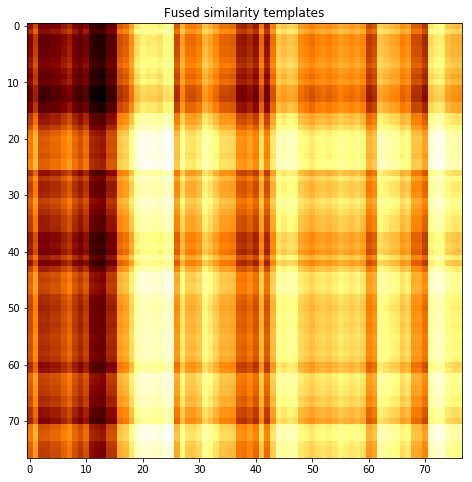

subject 10; gesture 1_1_2


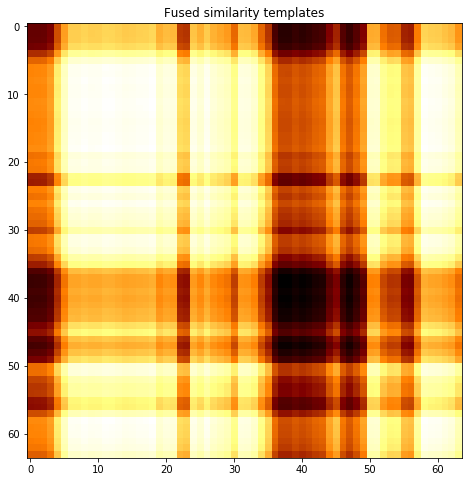

subject 10; gesture 1_1_1


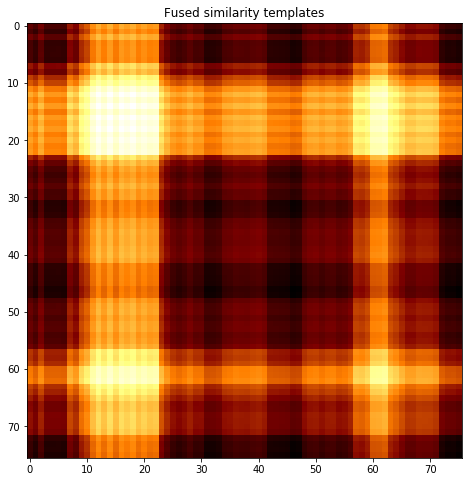

subject 10; gesture 1_0_1


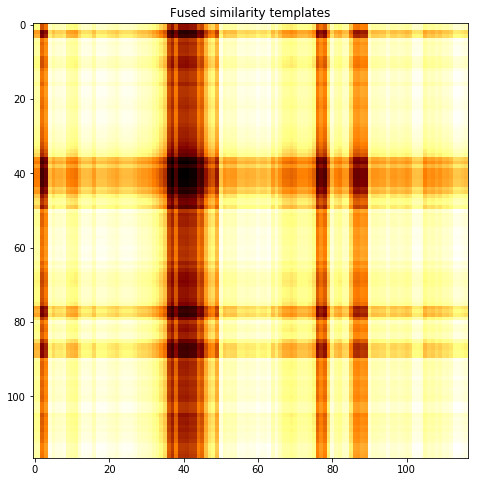

subject 10; gesture 1_0_2


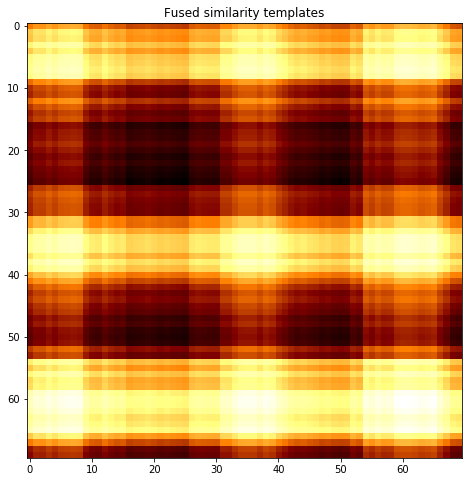

subject 02; gesture 1_1_2


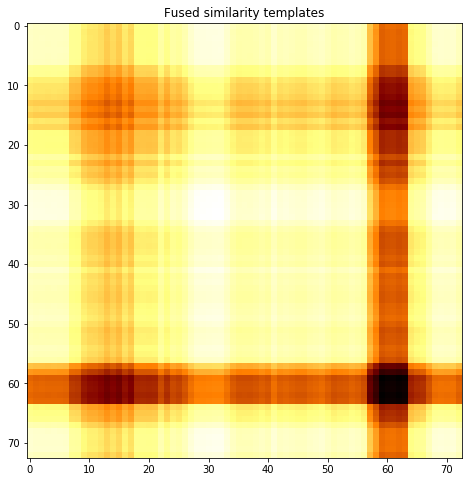

subject 02; gesture 1_1_1


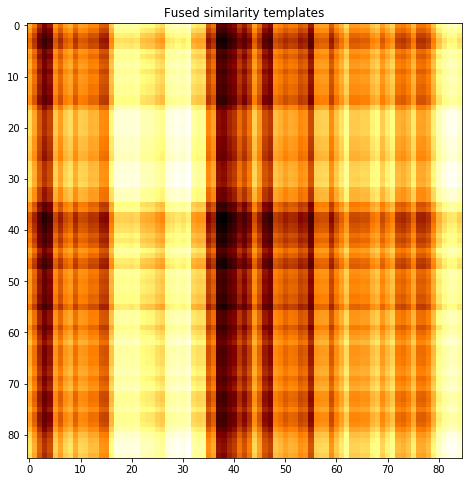

subject 02; gesture 1_0_1


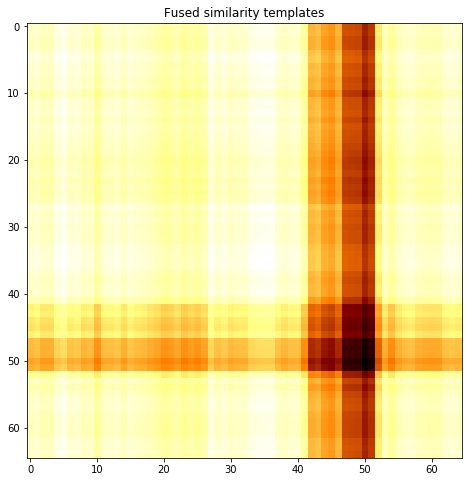

subject 02; gesture 1_0_2


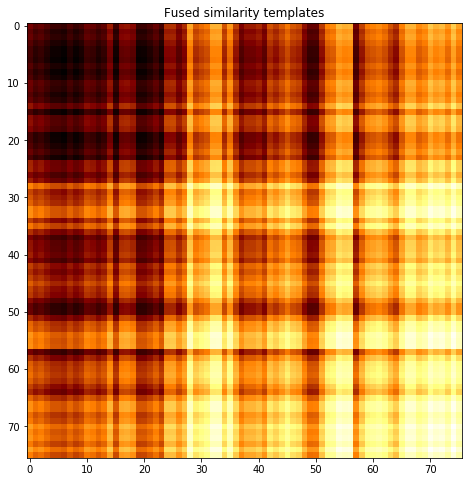

In [4]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.011802525629777481; sd 8.68913751783029e-09
subject 30; gesture 1_1_2; PoV: 0.9999999999788138


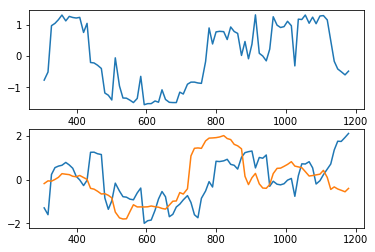

subject 30; gesture 1_1_1; avg 0.01169631574417185; sd 6.327210078976659e-14
subject 30; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


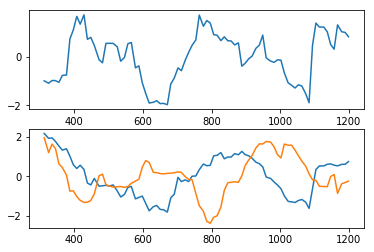

subject 30; gesture 1_0_1; avg 0.010686171920407024; sd 1.1256404454832517e-13
subject 30; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


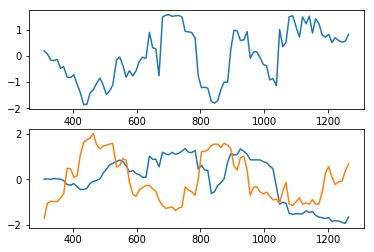

subject 30; gesture 1_0_2; avg 0.012831208387182958; sd 6.071961400181568e-09
subject 30; gesture 1_0_2; PoV: 0.9999999999425302


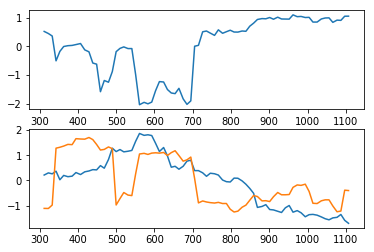

subject 06; gesture 1_1_2; avg 0.027333112397588278; sd 1.6622978160359023e-08
subject 06; gesture 1_1_2; PoV: 0.9999999998352264


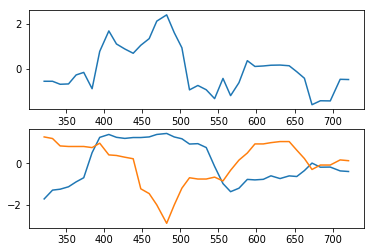

subject 06; gesture 1_1_1; avg 0.013573322300132041; sd 3.7176982068481466e-08
subject 06; gesture 1_1_1; PoV: 0.9999999981345813


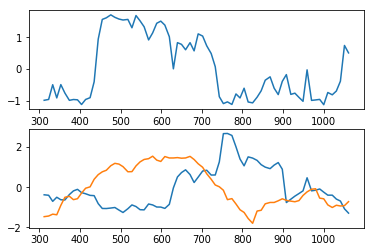

subject 06; gesture 1_0_1; avg 0.015063147987725954; sd 4.65556958799662e-15
subject 06; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


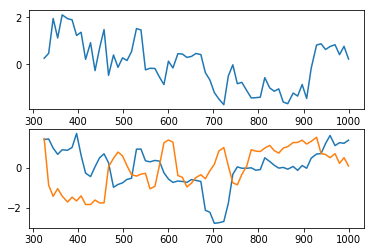

subject 06; gesture 1_0_2; avg 0.018756874428177583; sd 9.275761560866088e-10
subject 06; gesture 1_0_2; PoV: 0.9999999999997887


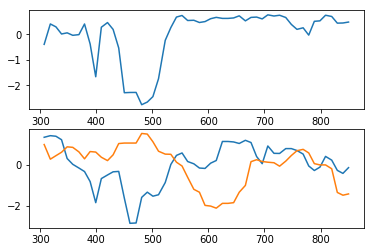

subject 09; gesture 1_1_2; avg 0.013624904324260006; sd 1.5449259237892908e-10
subject 09; gesture 1_1_2; PoV: 0.9999999999999868


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


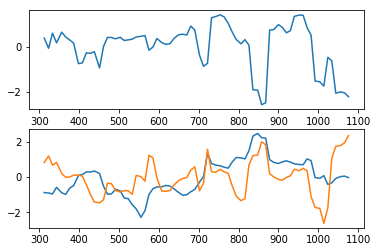

subject 09; gesture 1_1_1; avg 0.015346369983059497; sd 7.160560581504195e-08
subject 09; gesture 1_1_1; PoV: 0.9999999874238243


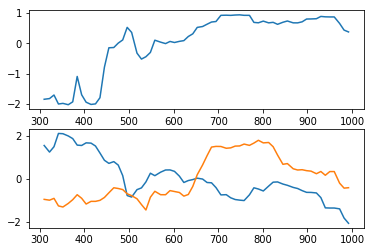

subject 09; gesture 1_0_1; avg 0.011799817921341955; sd 2.2036800938620517e-13
subject 09; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


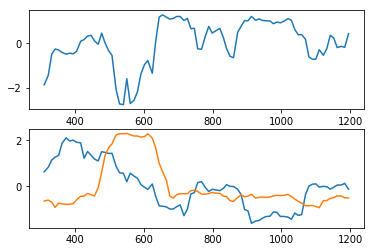

subject 09; gesture 1_0_2; avg 0.014293224107776328; sd 1.4852128534068721e-15
subject 09; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


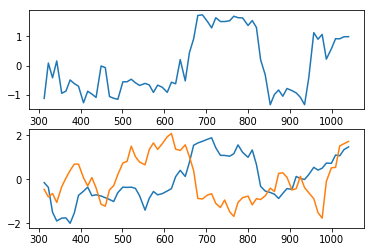

subject 03; gesture 1_1_2; avg 0.013205651931894876; sd 5.806038050749261e-12
subject 03; gesture 1_1_2; PoV: 0.9999999999999989


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


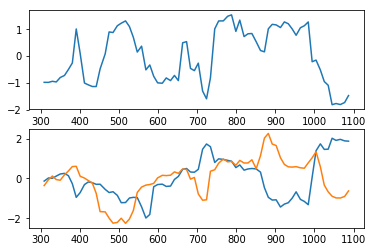

subject 03; gesture 1_1_1; avg 0.01845239663789418; sd 2.243894686244585e-05
subject 03; gesture 1_1_1; PoV: 0.9997703049465684


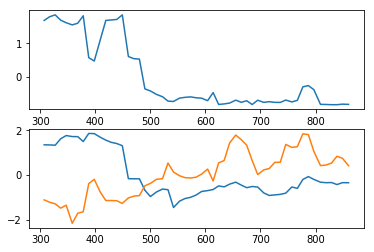

subject 03; gesture 1_0_1; avg 0.014265634203914397; sd 3.517420836536026e-08
subject 03; gesture 1_0_1; PoV: 0.99999999958159


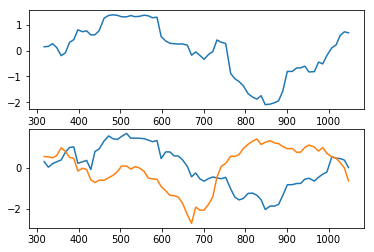

subject 03; gesture 1_0_2; avg 0.016180529806998935; sd 1.0776747808650486e-08
subject 03; gesture 1_0_2; PoV: 0.999999999976035


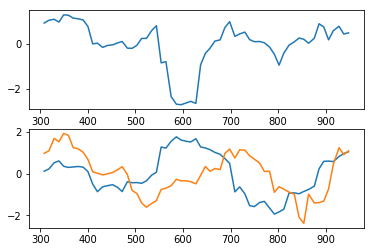

subject 05; gesture 1_1_2; avg 0.01804119371459668; sd 6.069584068427294e-08
subject 05; gesture 1_1_2; PoV: 0.999999998894097


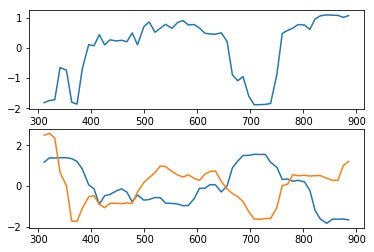

subject 05; gesture 1_1_1; avg 0.017852517286705304; sd 2.362758600214049e-10
subject 05; gesture 1_1_1; PoV: 0.9999999999995605


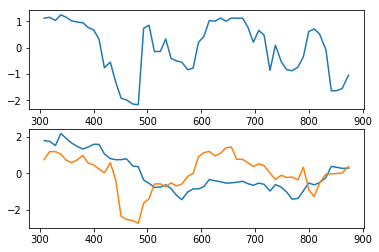

subject 05; gesture 1_0_1; avg 0.011527280410818876; sd 1.389776709595289e-11
subject 05; gesture 1_0_1; PoV: 0.9999999999999993


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


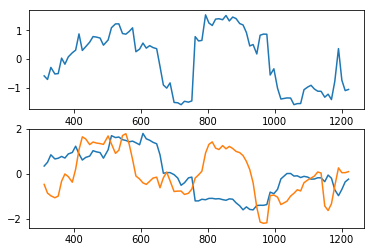

subject 05; gesture 1_0_2; avg 0.015091353512140571; sd 1.1383559340943569e-08
subject 05; gesture 1_0_2; PoV: 0.9999999999880322


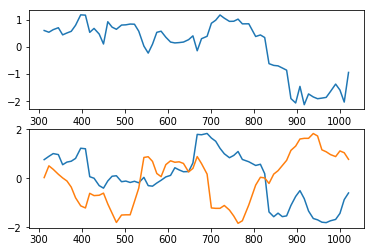

subject 21; gesture 1_1_2; avg 0.013928267239795816; sd 4.067362916209182e-11
subject 21; gesture 1_1_2; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


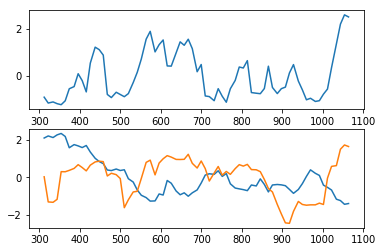

subject 21; gesture 1_1_1; avg 0.01606783224629859; sd 0.011247179218637614
subject 21; gesture 1_1_1; PoV: 0.5947270408017274


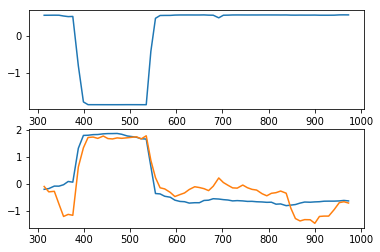

subject 21; gesture 1_0_1; avg 0.016918130101550213; sd 1.0933415511707227e-09
subject 21; gesture 1_0_1; PoV: 0.9999999999993042


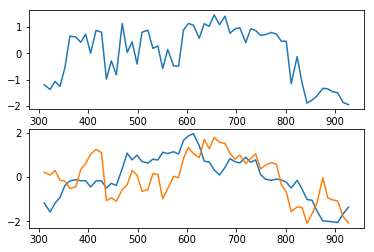

subject 21; gesture 1_0_2; avg 0.017303677138653516; sd 5.464854069604351e-08
subject 21; gesture 1_0_2; PoV: 0.9999999991900311


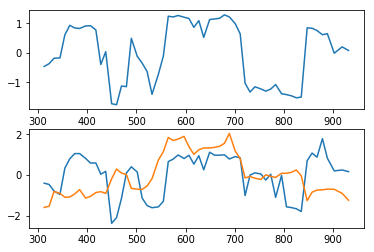

subject 17; gesture 1_1_2; avg 0.013533350338929055; sd 2.980264866486868e-10
subject 17; gesture 1_1_2; PoV: 0.9999999999999621


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


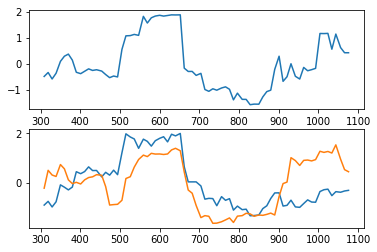

subject 17; gesture 1_1_1; avg 0.016036421978724645; sd 1.0851394427971967e-11
subject 17; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


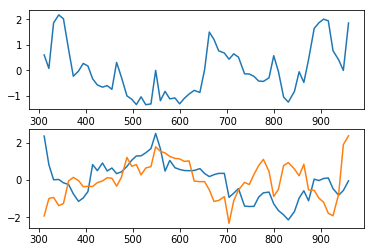

subject 17; gesture 1_0_1; avg 0.014167673527762336; sd 8.884661794887365e-11
subject 17; gesture 1_0_1; PoV: 0.9999999999999817


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


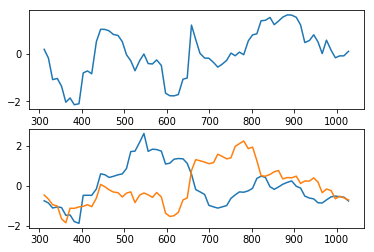

subject 17; gesture 1_0_2; avg 0.016162909234224445; sd 1.8041355259106384e-06
subject 17; gesture 1_0_2; PoV: 0.9999964629334224


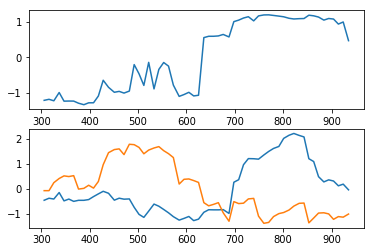

subject 01; gesture 1_1_2; avg 0.015580459175213156; sd 2.911473496575922e-08
subject 01; gesture 1_1_2; PoV: 0.9999999936412898


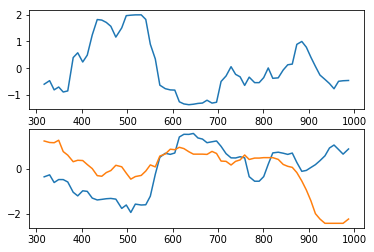

subject 01; gesture 1_1_1; avg 0.01453933135276414; sd 5.778505656108546e-13
subject 01; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


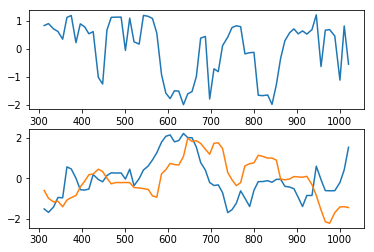

subject 01; gesture 1_0_1; avg 0.01099991839474044; sd 1.4499139839701569e-12
subject 01; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


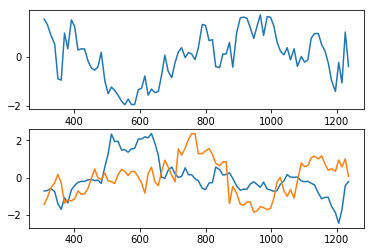

subject 01; gesture 1_0_2; avg 0.012194449513809399; sd 1.619854529185205e-14
subject 01; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


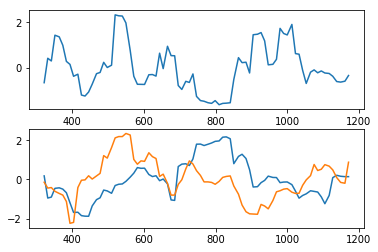

subject 16; gesture 1_1_2; avg 0.019275650511883593; sd 4.0415206585477896e-07
subject 16; gesture 1_1_2; PoV: 0.9999986196910692


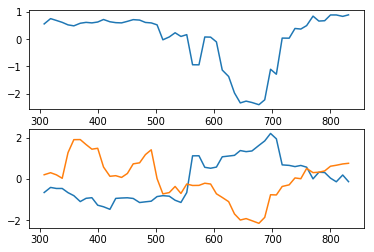

subject 16; gesture 1_1_1; avg 0.01376905233615772; sd 8.85370761639966e-08
subject 16; gesture 1_1_1; PoV: 0.9999999984110205


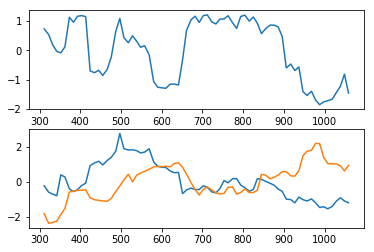

subject 16; gesture 1_0_1; avg 0.021235943103164644; sd 2.393243166572665e-10
subject 16; gesture 1_0_1; PoV: 0.9999999999999194


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


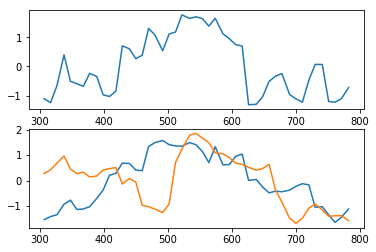

subject 16; gesture 1_0_2; avg 0.01831675545226522; sd 2.9777633260730943e-07
subject 16; gesture 1_0_2; PoV: 0.9999999715610574


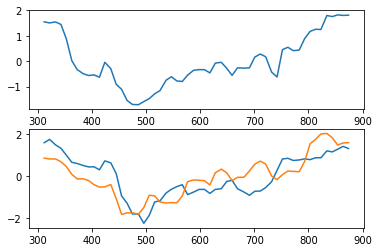

subject 26; gesture 1_1_2; avg 0.017937545046628926; sd 8.049439632171141e-09
subject 26; gesture 1_1_2; PoV: 0.9999999999671523


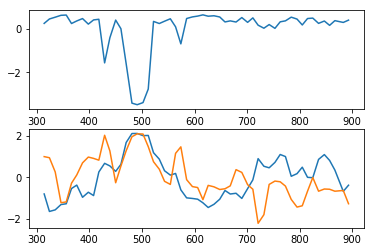

subject 26; gesture 1_1_1; avg 0.018289833294792075; sd 6.855029414266668e-07
subject 26; gesture 1_1_1; PoV: 0.9999999546638463


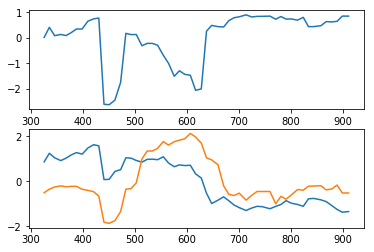

subject 26; gesture 1_0_1; avg 0.00504082567424218; sd 1.0521938940292737e-18
subject 26; gesture 1_0_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


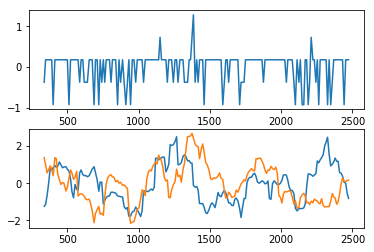

subject 26; gesture 1_0_2; avg 0.01498509038029161; sd 1.5086961142361034e-10
subject 26; gesture 1_0_2; PoV: 0.9999999999999701


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


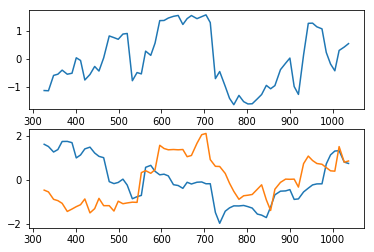

subject 32; gesture 1_1_2; avg 0.012992064016675924; sd 2.3143904689996054e-13
subject 32; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


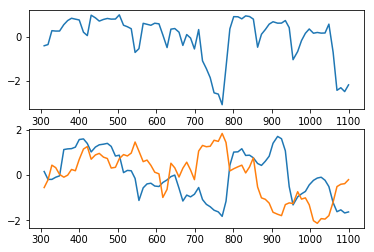

subject 32; gesture 1_1_1; avg 0.016359326465672078; sd 0.0008871201461567671
subject 32; gesture 1_1_1; PoV: 0.9839328020372397


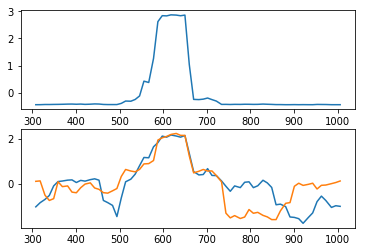

subject 32; gesture 1_0_1; avg 0.014299018539390477; sd 1.0922185532837824e-12
subject 32; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


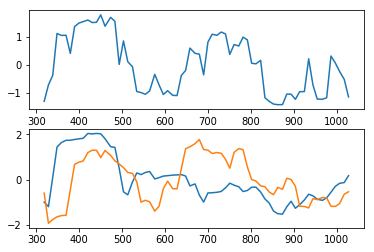

subject 32; gesture 1_0_2; avg 0.016997315501626014; sd 2.4603958472415053e-08
subject 32; gesture 1_0_2; PoV: 0.9999999967661524


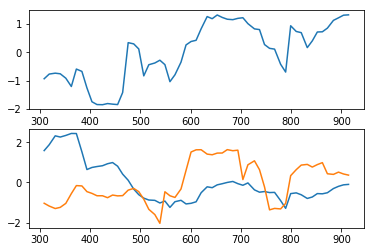

subject 04; gesture 1_1_2; avg 0.013950390864905337; sd 5.020872695139877e-06
subject 04; gesture 1_1_2; PoV: 0.9999925149738241


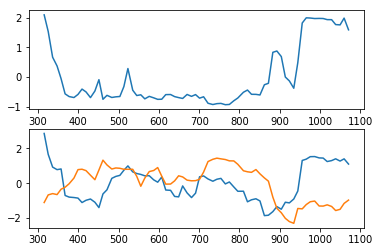

subject 04; gesture 1_1_1; avg 0.014531000897057021; sd 1.028724975666803e-08
subject 04; gesture 1_1_1; PoV: 0.9999999994198211


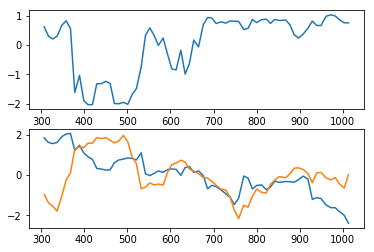

subject 04; gesture 1_0_1; avg 0.017113611228622243; sd 2.1500841151753295e-08
subject 04; gesture 1_0_1; PoV: 0.9999999988831489


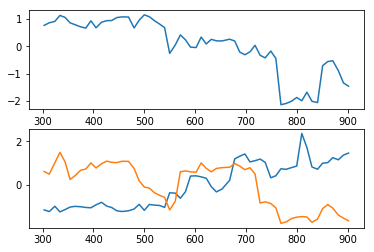

subject 04; gesture 1_0_2; avg 0.015821449183098673; sd 6.695247017882136e-13
subject 04; gesture 1_0_2; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


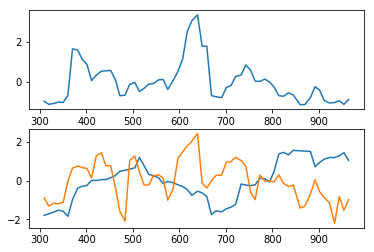

subject 08; gesture 1_1_2; avg 0.013519664396511852; sd 1.2756132412446032e-14
subject 08; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


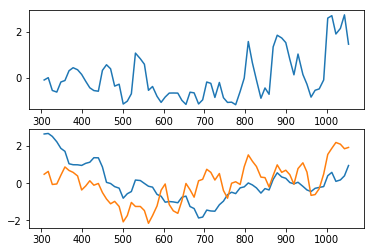

subject 08; gesture 1_1_1; avg 0.016317972242775702; sd 4.5674169217522025e-09
subject 08; gesture 1_1_1; PoV: 0.9999999999951338


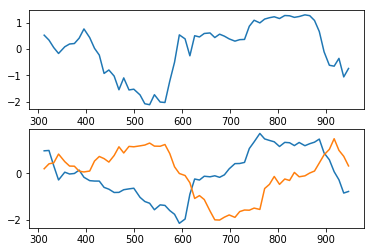

subject 08; gesture 1_0_1; avg 0.015161629450832239; sd 3.0273180157851187e-10
subject 08; gesture 1_0_1; PoV: 0.9999999999993403


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


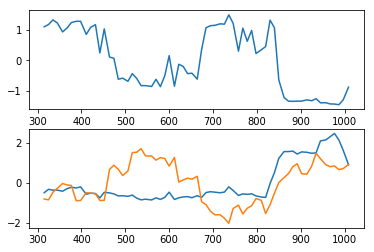

subject 08; gesture 1_0_2; avg 0.01619603887094711; sd 1.6316398916080067e-13
subject 08; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


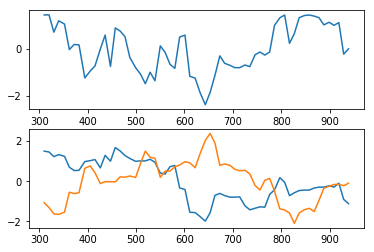

subject 27; gesture 1_1_2; avg 0.014397658195302039; sd 4.3249677553593384e-08
subject 27; gesture 1_1_2; PoV: 0.9999999932930215


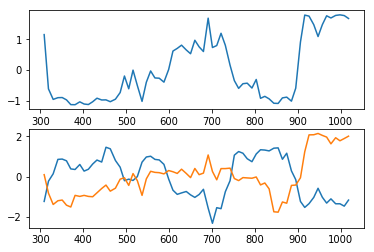

subject 27; gesture 1_1_1; avg 0.010439178366410628; sd 3.5296151060331136e-13
subject 27; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


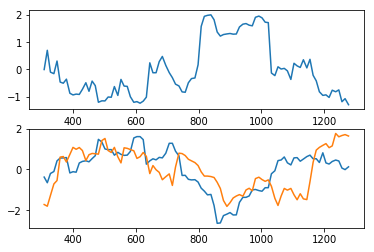

subject 27; gesture 1_0_1; avg 0.01468087541739342; sd 9.56232867451094e-08
subject 27; gesture 1_0_1; PoV: 0.9999999964977908


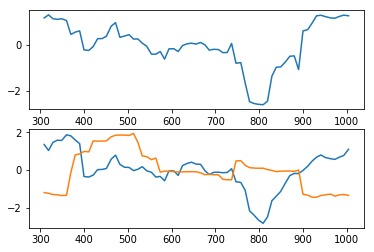

subject 27; gesture 1_0_2; avg 0.01550630314256898; sd 3.107355413040806e-15
subject 27; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


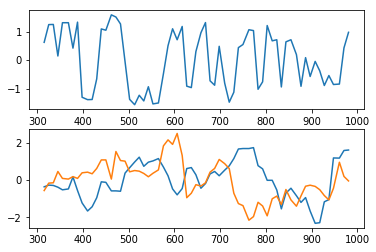

subject 14; gesture 1_1_2; avg 0.013402733176651804; sd 6.299623343722057e-11
subject 14; gesture 1_1_2; PoV: 0.9999999999999956


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


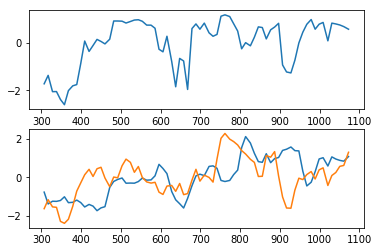

subject 14; gesture 1_1_1; avg 0.019645366884486034; sd 1.3615833847932616e-15
subject 14; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


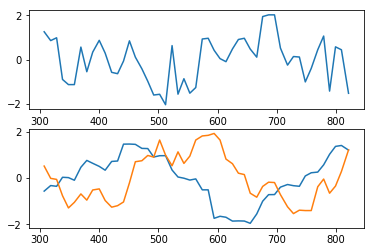

subject 14; gesture 1_0_1; avg 0.012790458084931759; sd 4.558098918255912e-13
subject 14; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


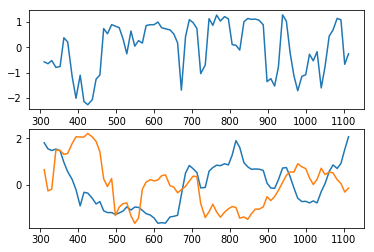

subject 14; gesture 1_0_2; avg 0.01425990388268699; sd 6.9170352222846e-11
subject 14; gesture 1_0_2; PoV: 0.9999999999999973


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


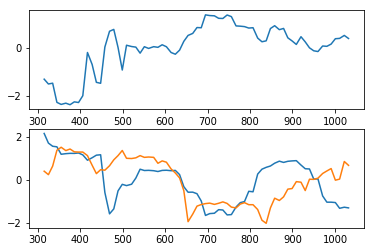

subject 23; gesture 1_1_2; avg 0.013046381114344644; sd 3.9963988961691604e-11
subject 23; gesture 1_1_2; PoV: 0.9999999999999913


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


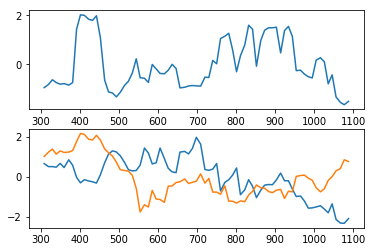

subject 23; gesture 1_1_1; avg 0.011851977610507474; sd 1.188178902608388e-06
subject 23; gesture 1_1_1; PoV: 0.9999993658814349


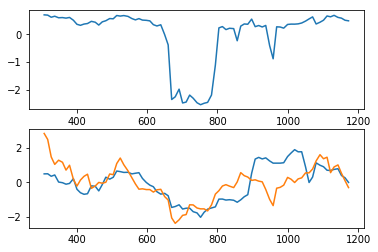

subject 23; gesture 1_0_1; avg 0.011989910315518262; sd 8.65836174757805e-11
subject 23; gesture 1_0_1; PoV: 0.9999999999999906


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


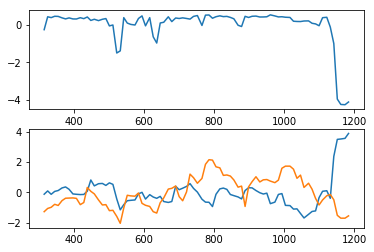

subject 23; gesture 1_0_2; avg 0.014413630024301781; sd 3.5679600947541604e-11
subject 23; gesture 1_0_2; PoV: 0.9999999999999987


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


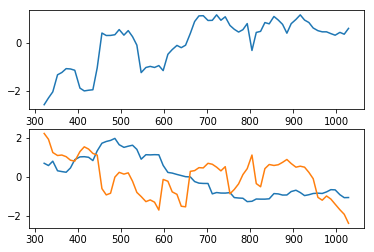

subject 25; gesture 1_1_2; avg 0.015919156640341995; sd 1.3641734291648465e-05
subject 25; gesture 1_1_2; PoV: 0.9997579231333494


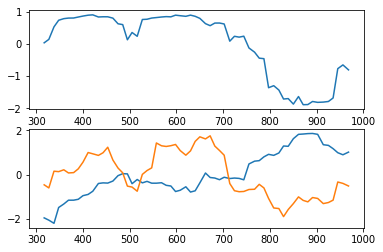

subject 25; gesture 1_1_1; avg 0.01220345838017016; sd 1.1701639498206943e-12
subject 25; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


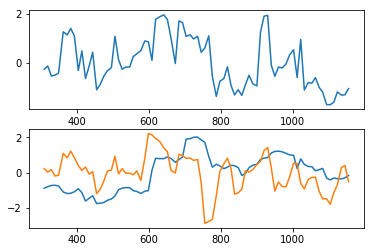

subject 25; gesture 1_0_1; avg 0.014766753814958063; sd 5.49575714232575e-14
subject 25; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


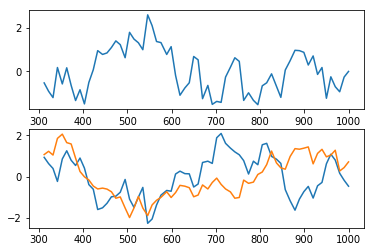

subject 25; gesture 1_0_2; avg 0.01628899243187118; sd 2.5304130052646177e-11
subject 25; gesture 1_0_2; PoV: 0.9999999999996488


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


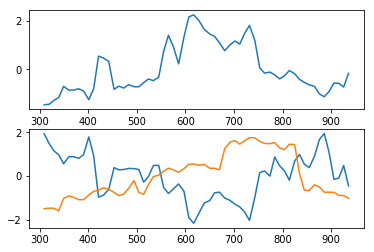

subject 18; gesture 1_1_2; avg 0.012585179656944803; sd 1.6594109973955605e-08
subject 18; gesture 1_1_2; PoV: 0.9999999969112361


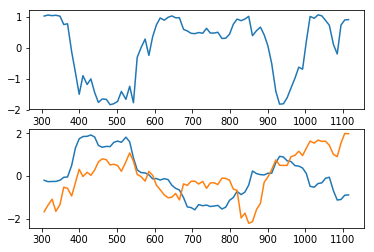

subject 18; gesture 1_1_1; avg 0.013167385496515588; sd 1.1756013198959823e-07
subject 18; gesture 1_1_1; PoV: 0.9999999944476128


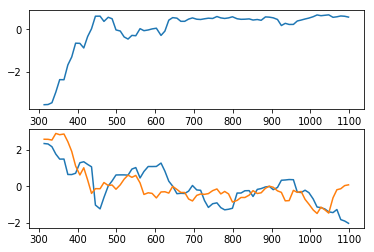

subject 18; gesture 1_0_1; avg 0.01910752589632511; sd 7.766832401739821e-05
subject 18; gesture 1_0_1; PoV: 0.9995135332632565


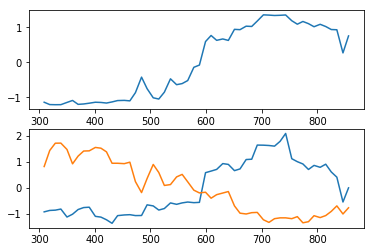

subject 18; gesture 1_0_2; avg 0.012368665763579876; sd 3.661546100162562e-08
subject 18; gesture 1_0_2; PoV: 0.9999999918034695


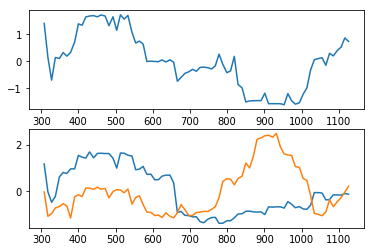

subject 29; gesture 1_1_2; avg 0.015523890595193568; sd 7.489943787370795e-09
subject 29; gesture 1_1_2; PoV: 0.999999999992074


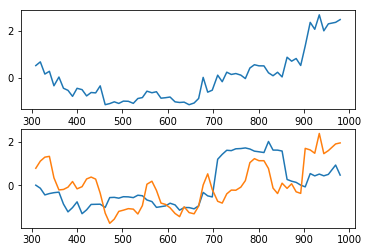

subject 29; gesture 1_1_1; avg 0.017897255301853033; sd 8.199811873441803e-15
subject 29; gesture 1_1_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


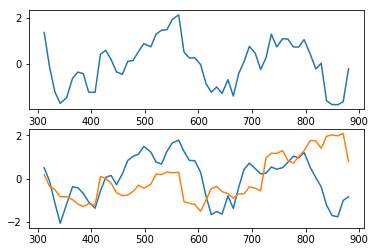

subject 29; gesture 1_0_1; avg 0.015423210760068083; sd 5.77662160724057e-08
subject 29; gesture 1_0_1; PoV: 0.9999999996807339


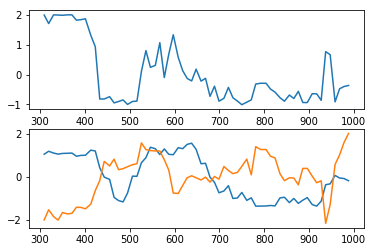

subject 29; gesture 1_0_2; avg 0.014850267450641578; sd 2.5508101705229508e-05
subject 29; gesture 1_0_2; PoV: 0.9998898794326319


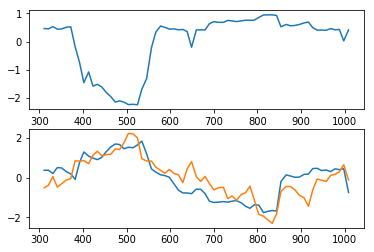

subject 15; gesture 1_1_2; avg 0.012894283284169934; sd 4.693579559748838e-07
subject 15; gesture 1_1_2; PoV: 0.999999982602488


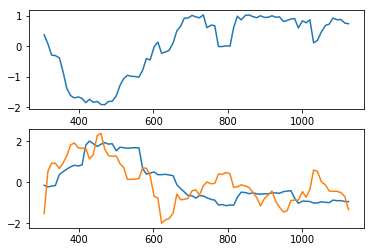

subject 15; gesture 1_1_1; avg 0.015899025181969274; sd 2.288354408497642e-14
subject 15; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


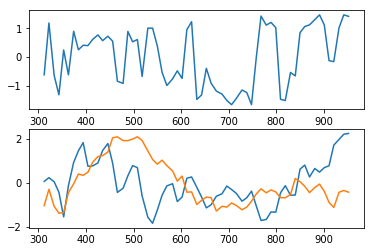

subject 15; gesture 1_0_1; avg 0.017021184571049484; sd 1.1514000610714657e-08
subject 15; gesture 1_0_1; PoV: 0.9999999990583236


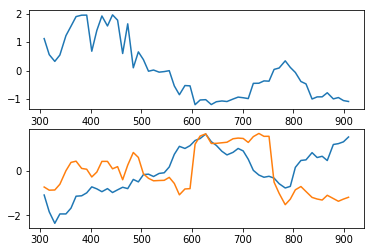

subject 15; gesture 1_0_2; avg 0.01555336341780121; sd 5.703231259906532e-13
subject 15; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


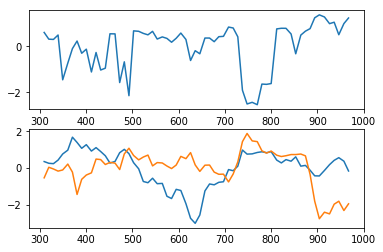

subject 28; gesture 1_1_2; avg 0.020625217284300775; sd 6.8499215237380205e-09
subject 28; gesture 1_1_2; PoV: 0.999999999991514


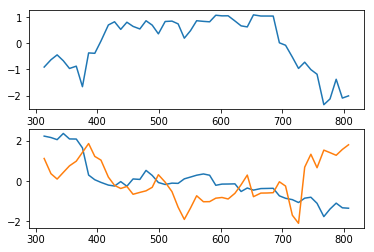

subject 28; gesture 1_1_1; avg 0.0252633469800574; sd 5.073002861761108e-10
subject 28; gesture 1_1_1; PoV: 0.9999999999999447


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


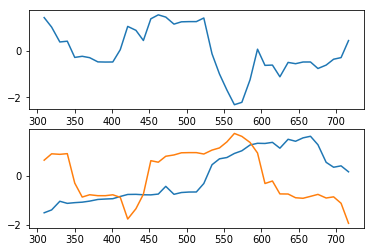

subject 28; gesture 1_0_1; avg 0.018666053456322832; sd 1.5599230514530665e-05
subject 28; gesture 1_0_1; PoV: 0.9998859579722509


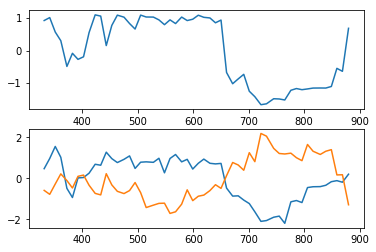

subject 28; gesture 1_0_2; avg 0.016826677298016138; sd 4.157068603010939e-08
subject 28; gesture 1_0_2; PoV: 0.9999999771065678


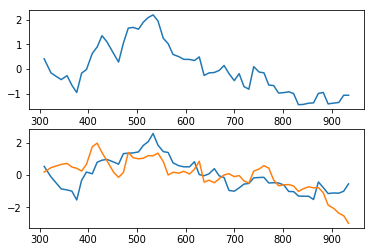

subject 12; gesture 1_1_2; avg 0.013497130980858143; sd 6.781853900354476e-09
subject 12; gesture 1_1_2; PoV: 0.9999999999601981


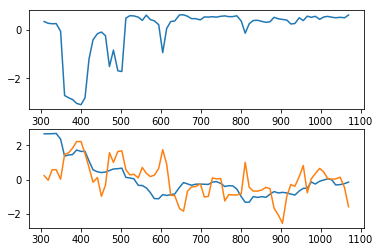

subject 12; gesture 1_1_1; avg 0.013781400718448493; sd 7.52368317481343e-15
subject 12; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


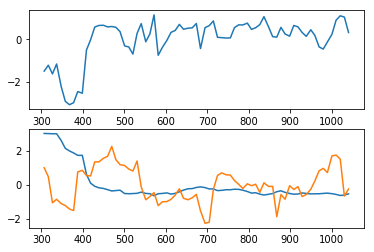

subject 12; gesture 1_0_1; avg 0.013548069601927915; sd 4.939146442307436e-10
subject 12; gesture 1_0_1; PoV: 0.9999999999994582


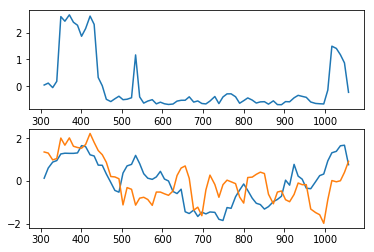

subject 12; gesture 1_0_2; avg 0.01579787662716279; sd 3.2010277813424405e-11
subject 12; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


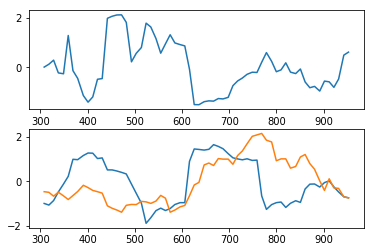

subject 19; gesture 1_1_2; avg 0.012970826429434847; sd 2.540271397176967e-10
subject 19; gesture 1_1_2; PoV: 0.999999999999556


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


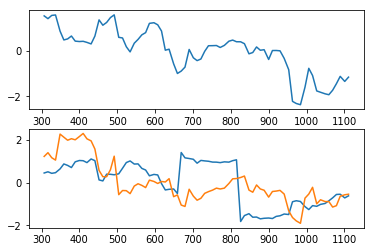

subject 19; gesture 1_1_1; avg 0.016617804468214686; sd 1.6108649483049814e-10
subject 19; gesture 1_1_1; PoV: 0.9999999999999941


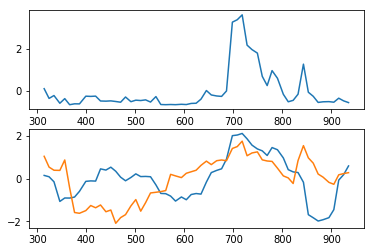

subject 19; gesture 1_0_1; avg 0.01938083385127735; sd 4.984750378567536e-09
subject 19; gesture 1_0_1; PoV: 0.9999999999429829


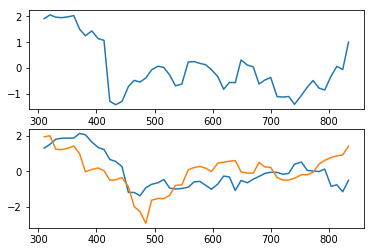

subject 19; gesture 1_0_2; avg 0.01582559790698481; sd 4.165735462961323e-12
subject 19; gesture 1_0_2; PoV: 0.9999999999999964


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


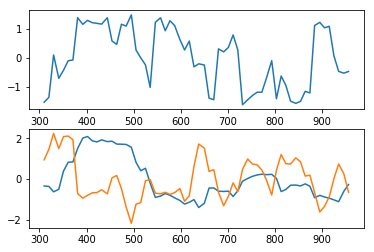

subject 07; gesture 1_1_2; avg 0.01208419698099853; sd 1.5376998717862335e-17
subject 07; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


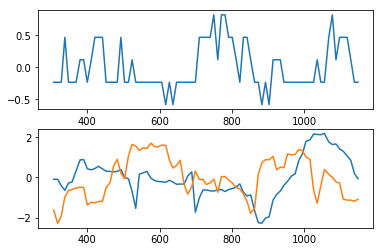

subject 07; gesture 1_1_1; avg 0.014586147755588792; sd 5.856952435002091e-09
subject 07; gesture 1_1_1; PoV: 0.9999999999470386


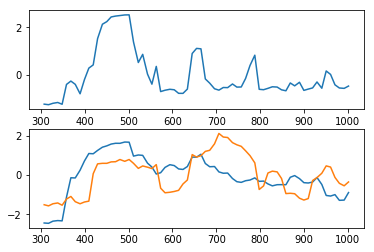

subject 07; gesture 1_0_1; avg 0.01090078884400618; sd 1.1369794157474714e-12
subject 07; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


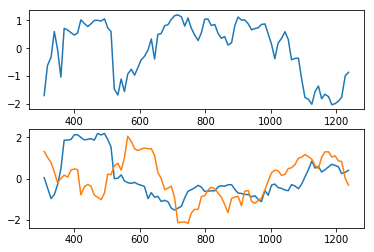

subject 07; gesture 1_0_2; avg 0.013612736332498472; sd 3.830619129201541e-14
subject 07; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


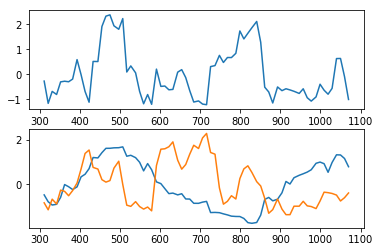

subject 20; gesture 1_1_2; avg 0.013221698807334441; sd 4.91111359736919e-11
subject 20; gesture 1_1_2; PoV: 0.999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


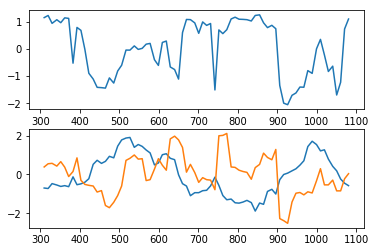

subject 20; gesture 1_1_1; avg 0.012505781471946368; sd 8.642073055518317e-14
subject 20; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


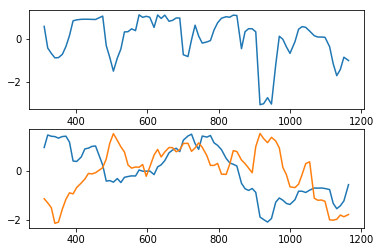

subject 20; gesture 1_0_1; avg 0.012719024698723977; sd 2.0528578648023705e-18
subject 20; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


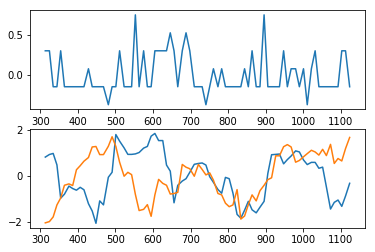

subject 20; gesture 1_0_2; avg 0.009727309648000705; sd 1.05236730935115e-15
subject 20; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


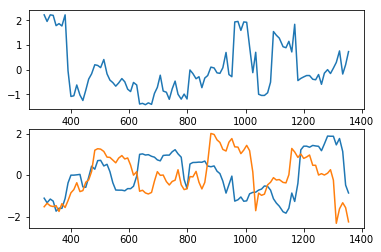

subject 31; gesture 1_1_2; avg 0.016166462300956065; sd 1.9947507954821535e-06
subject 31; gesture 1_1_2; PoV: 0.9999882502080507


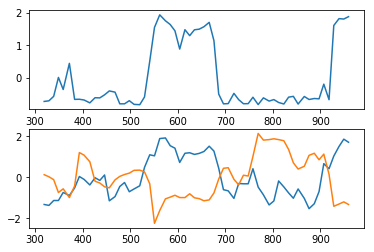

subject 31; gesture 1_1_1; avg 0.015622459878267063; sd 9.505220076987675e-07
subject 31; gesture 1_1_1; PoV: 0.9999998680204467


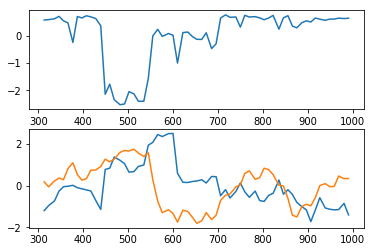

subject 31; gesture 1_0_1; avg 0.010567005875433069; sd 5.854422723537732e-14
subject 31; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


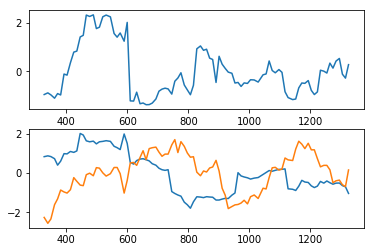

subject 31; gesture 1_0_2; avg 0.015207202061678008; sd 1.318476835878876e-13
subject 31; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


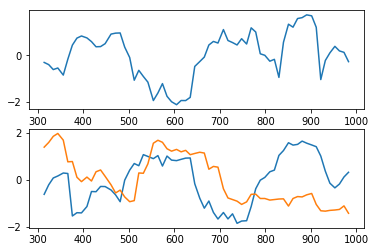

subject 13; gesture 1_1_2; avg 0.01112431137421818; sd 9.735292998944705e-11
subject 13; gesture 1_1_2; PoV: 0.999999999999939


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


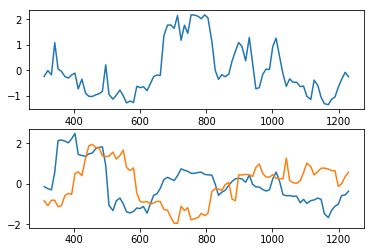

subject 13; gesture 1_1_1; avg 0.012865176227959381; sd 2.272455549830819e-08
subject 13; gesture 1_1_1; PoV: 0.9999999998848604


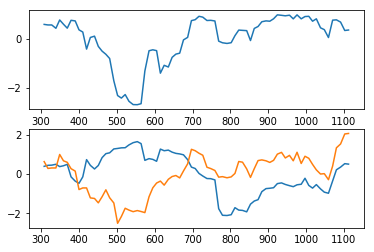

subject 13; gesture 1_0_1; avg 0.005568222450241396; sd 3.482856444505513e-18
subject 13; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


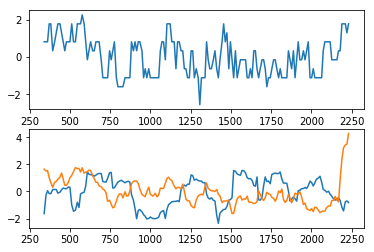

subject 13; gesture 1_0_2; avg 0.009717673659699095; sd 2.2902234356009138e-10
subject 13; gesture 1_0_2; PoV: 0.9999999999995459


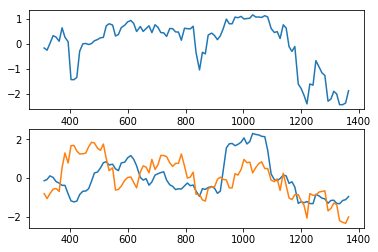

subject 36; gesture 1_1_2; avg 0.015173912128961698; sd 1.9083776438807703e-13
subject 36; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


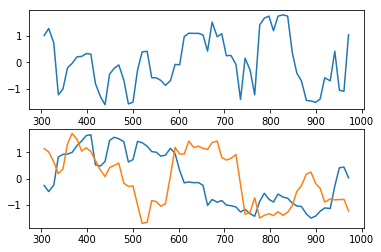

subject 36; gesture 1_1_1; avg 0.01328866547663478; sd 5.443588085446414e-12
subject 36; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


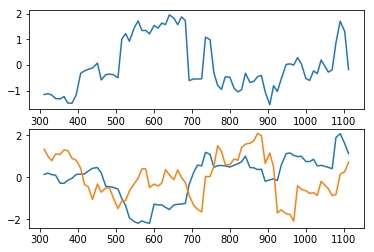

subject 36; gesture 1_0_1; avg 0.01695074270337664; sd 7.257923394567182e-08
subject 36; gesture 1_0_1; PoV: 0.9999999865348876


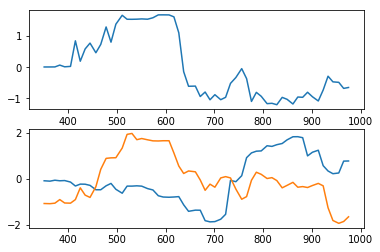

subject 36; gesture 1_0_2; avg 0.016806793620742326; sd 1.7737447840313482e-09
subject 36; gesture 1_0_2; PoV: 0.999999999997808


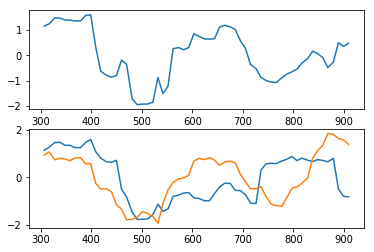

subject 24; gesture 1_1_2; avg 0.014103326025561743; sd 3.179297700069458e-14
subject 24; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


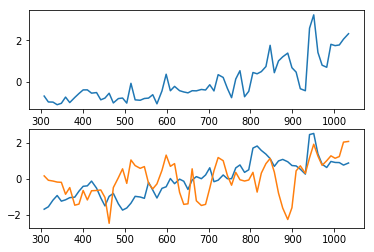

subject 24; gesture 1_1_1; avg 0.015893721812807363; sd 7.946253956440015e-07
subject 24; gesture 1_1_1; PoV: 0.9999985835067556


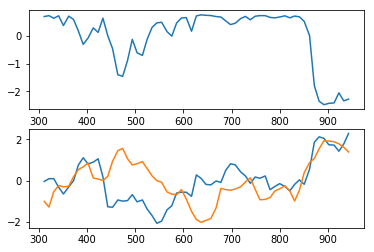

subject 24; gesture 1_0_1; avg 0.01316685335640093; sd 1.5731722054622525e-11
subject 24; gesture 1_0_1; PoV: 1.0


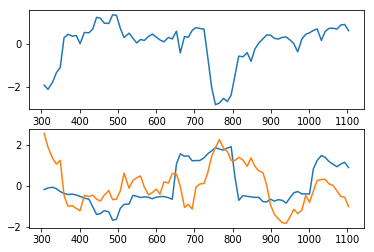

subject 24; gesture 1_0_2; avg 0.013714005261767906; sd 1.2793952100174452e-12
subject 24; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


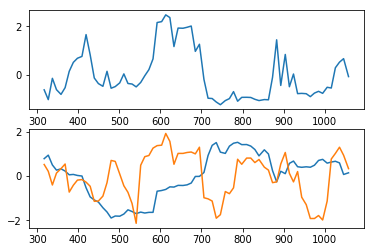

subject 33; gesture 1_1_2; avg 0.013531760842518465; sd 1.6364685310680268e-11
subject 33; gesture 1_1_2; PoV: 0.9999999999999993


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


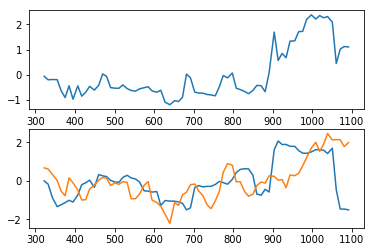

subject 33; gesture 1_1_1; avg 0.013183786575635806; sd 8.145566410874593e-15
subject 33; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


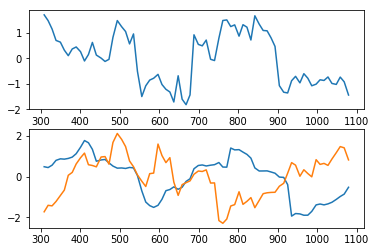

subject 33; gesture 1_0_1; avg 0.014431416471094832; sd 7.347159586744875e-10
subject 33; gesture 1_0_1; PoV: 0.9999999999996083


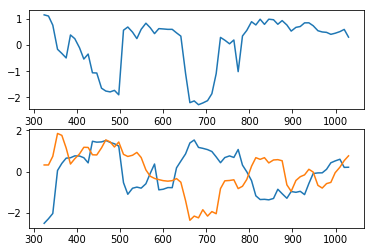

subject 33; gesture 1_0_2; avg 0.013216925002260039; sd 5.594881863101293e-10
subject 33; gesture 1_0_2; PoV: 0.9999999999988529


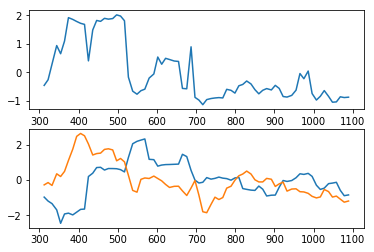

subject 11; gesture 1_1_2; avg 0.012686462552161654; sd 1.0406525025671873e-14
subject 11; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


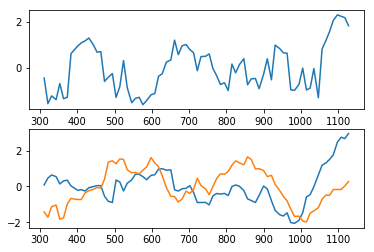

subject 11; gesture 1_1_1; avg 0.011420705379257157; sd 3.9164655592751526e-13
subject 11; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


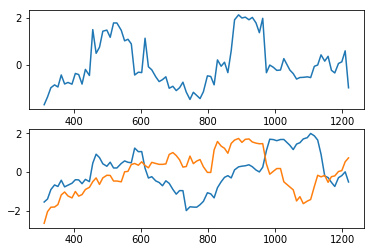

subject 11; gesture 1_0_1; avg 0.01193695582965777; sd 5.957789474140035e-12
subject 11; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


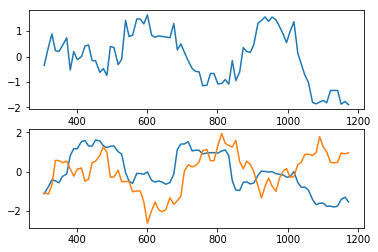

subject 11; gesture 1_0_2; avg 0.014136797738994077; sd 1.995922199599094e-10
subject 11; gesture 1_0_2; PoV: 0.9999999999997412


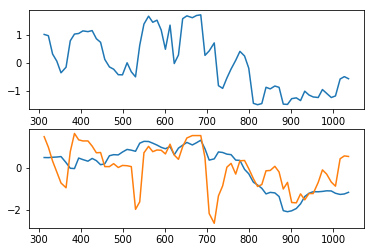

subject 35; gesture 1_1_2; avg 0.01357056071411663; sd 8.487974702687136e-09
subject 35; gesture 1_1_2; PoV: 0.9999999970273682


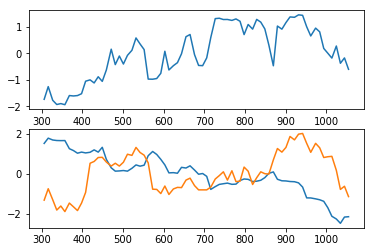

subject 35; gesture 1_1_1; avg 0.017870441352195558; sd 1.152629153524449e-08
subject 35; gesture 1_1_1; PoV: 0.9999999997905339


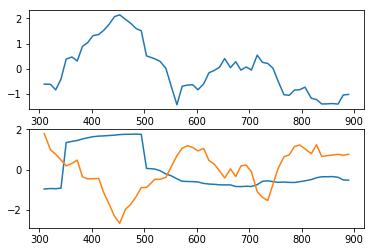

subject 35; gesture 1_0_1; avg 0.014757148548268605; sd 1.751079000366053e-08
subject 35; gesture 1_0_1; PoV: 0.9999999944763526


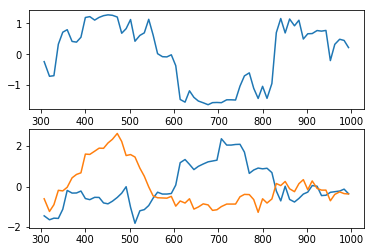

subject 35; gesture 1_0_2; avg 0.012791814882745986; sd 7.244053624045667e-10
subject 35; gesture 1_0_2; PoV: 0.9999999999996757


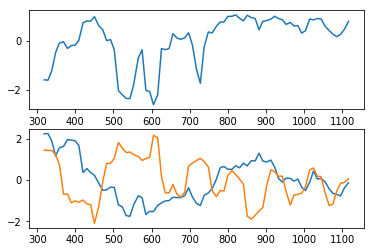

subject 22; gesture 1_1_2; avg 0.019129205641819684; sd 7.305377051470579e-08
subject 22; gesture 1_1_2; PoV: 0.9999999992757396


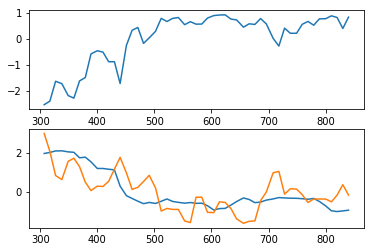

subject 22; gesture 1_1_1; avg 0.015273197089144847; sd 7.710203813189416e-12
subject 22; gesture 1_1_1; PoV: 0.9999999999999993


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


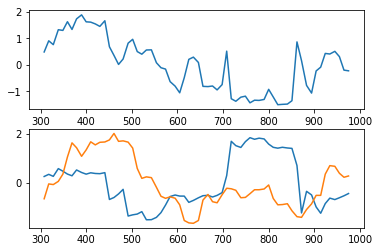

subject 22; gesture 1_0_1; avg 0.01703415006607423; sd 6.646974243967355e-09
subject 22; gesture 1_0_1; PoV: 0.9999999999524469


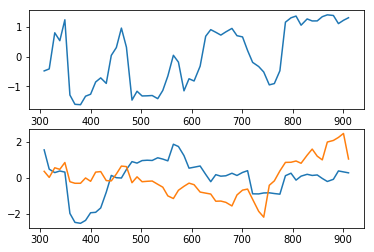

subject 22; gesture 1_0_2; avg 0.01420729368657659; sd 9.598548724757347e-11
subject 22; gesture 1_0_2; PoV: 0.9999999999999967


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


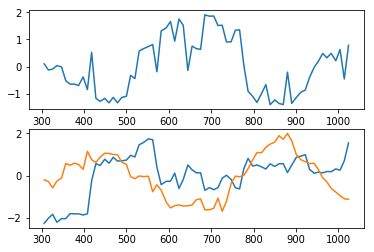

subject 34; gesture 1_1_2; avg 0.015003873123591907; sd 2.892526268752744e-14
subject 34; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


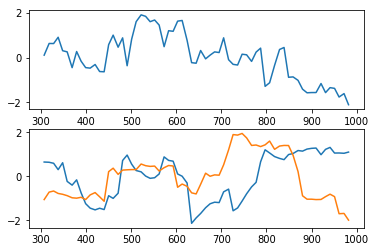

subject 34; gesture 1_1_1; avg 0.010644276945463561; sd 6.522219938907421e-10
subject 34; gesture 1_1_1; PoV: 0.9999999999996375


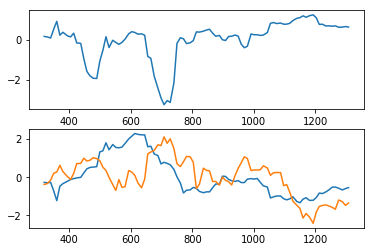

subject 34; gesture 1_0_1; avg 0.01261982716466928; sd 9.204966244979842e-08
subject 34; gesture 1_0_1; PoV: 0.9999999934440241


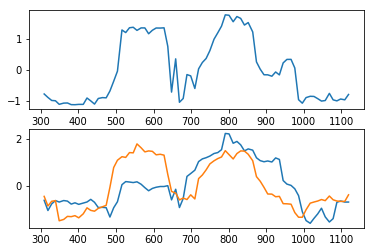

subject 34; gesture 1_0_2; avg 0.013030671341429356; sd 2.449883647817496e-12
subject 34; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


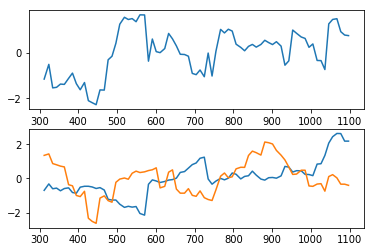

subject 10; gesture 1_1_2; avg 0.015734144623923786; sd 8.612829724565023e-08
subject 10; gesture 1_1_2; PoV: 0.9999999965861397


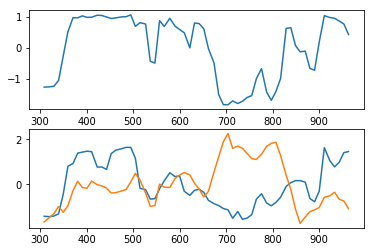

subject 10; gesture 1_1_1; avg 0.013552321923625299; sd 1.308778088874233e-08
subject 10; gesture 1_1_1; PoV: 0.9999999999738596


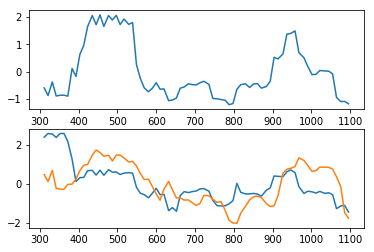

subject 10; gesture 1_0_1; avg 0.008562166534685983; sd 7.185657591787568e-15
subject 10; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


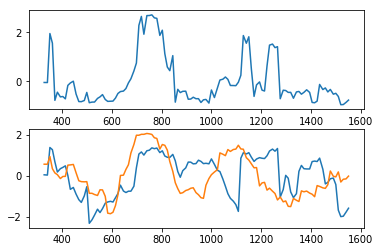

subject 10; gesture 1_0_2; avg 0.014441030316368005; sd 7.142424084091815e-12
subject 10; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


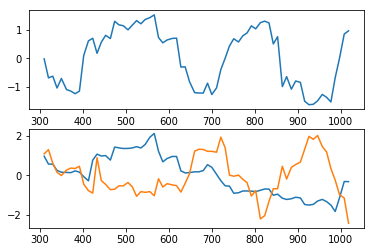

subject 02; gesture 1_1_2; avg 0.013934832736637377; sd 3.943028711773995e-09
subject 02; gesture 1_1_2; PoV: 0.9999999999891072


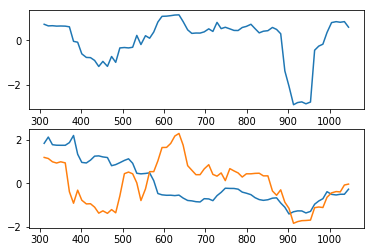

subject 02; gesture 1_1_1; avg 0.011845428404875884; sd 1.0182528006721043e-14
subject 02; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


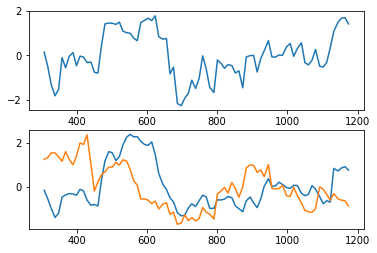

subject 02; gesture 1_0_1; avg 0.015529824926171937; sd 1.9769555459221237e-09
subject 02; gesture 1_0_1; PoV: 0.9999999999789482


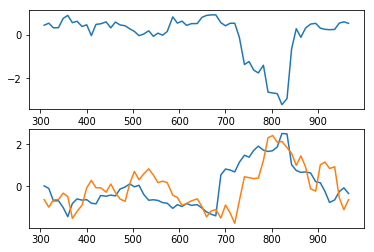

subject 02; gesture 1_0_2; avg 0.013221521248869349; sd 4.2391653355254785e-13
subject 02; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


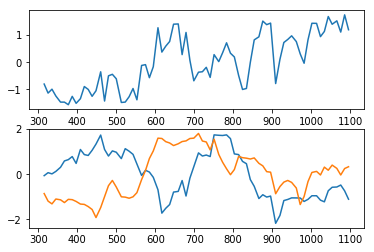

In [5]:
decomp_g1_ant = {}

for s, gdict in g1_dict_antag.items():
    decomp_g1_ant[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_ant[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26

gesture 1_1_2

gesture 1_0_1

32

gesture 1_1_1

08

gesture 1_1_2

gesture 1_0_1

27

gesture 1_1_1

gesture 1_0_2

23

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25

gesture 1_0_1


18

gesture 1_1_2

gesture 1_1_1

29

gesture 1_1_1

gesture 1_0_1

15

gesture 1_1_1

12

gesture 1_1_2

gesture 1_0_1

19

gesture 1_1_1

07

gesture 1_1_2

gesture 1_0_1

gesture 1_0_2

20

gesture 1_0_1

31

gesture 1_1_2

gesture 1_0_1

13

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

36

gesture 1_1_2

24

gesture 1_1_1

gesture 1_0_1

33

gesture 1_0_1

11

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

gesture 1_0_2

35

gesture 1_0_2

22

gesture 1_0_1

gesture 1_0_2

34

gesture 1_0_1

gesture 1_0_2

10

gesture 1_1_2

gesture 1_0_1

---

In [6]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_ant.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_ant.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [7]:
np.average([d for d in compares["30"].values()])

6.389798109662504